<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Введение" data-toc-modified-id="Введение-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Введение</a></span></li><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Обработка-пропусков" data-toc-modified-id="Обработка-пропусков-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Обработка пропусков</a></span></li><li><span><a href="#Удаление-аномальных-значений" data-toc-modified-id="Удаление-аномальных-значений-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Удаление аномальных значений</a></span></li><li><span><a href="#Удаление-неинформативных-признаков" data-toc-modified-id="Удаление-неинформативных-признаков-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Удаление неинформативных признаков</a></span></li><li><span><a href="#Обучение-модели" data-toc-modified-id="Обучение-модели-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Обучение модели</a></span><ul class="toc-item"><li><span><a href="#Подготовка-выборок" data-toc-modified-id="Подготовка-выборок-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Подготовка выборок</a></span></li><li><span><a href="#Обучение-базовой-модели" data-toc-modified-id="Обучение-базовой-модели-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Обучение базовой модели</a></span></li><li><span><a href="#Обучение-RFR-модели" data-toc-modified-id="Обучение-RFR-модели-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Обучение-RFR-модели</a></span></li><li><span><a href="#Обучение-LGBM-модели" data-toc-modified-id="Обучение-LGBM-модели-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Обучение-LGBM-модели</a></span></li></ul></li><li><span><a href="#Анализ-моделей" data-toc-modified-id="Анализ-моделей-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Анализ моделей</a></span></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Вывод</a></span></li>

## Введение

**Цель** - построить модель, которая будет определять рыночную стоимость автомобиля, имея в распоряжении данные о технических характеристиках, комплектации и ценах других автомобилей.

Критерии, которые важны заказчику:
- качество предсказания;
- время обучения модели;
- время предсказания модели.

Порядок работы:
1 - Загрузить и изучить данные

2 - Обработка пропусков, аномалий, удаление неинформативных признаков

3 - Подготовка выборок для обучения моделей.

4 - Обучение моделей Random Forest Regressor и градиентного бустинга LightGBM, подбор гиперпараметров.

5 - Анализ времени обучения, времени предсказания и качества моделей. Выбор лучшей модели, проверка её качества на тестовой выборке.

*Примечания:
Для оценки качества моделей Значение метрики RMSE должно быть меньше 2500.*

Признаки

- DateCrawled — дата скачивания анкеты из базы
- VehicleType — тип автомобильного кузова
- RegistrationYear — год регистрации автомобиля
- Gearbox — тип коробки передач
- Power — мощность (л. с.)
- Model — модель автомобиля
- Kilometer — пробег (км)
- RegistrationMonth — месяц регистрации автомобиля
- FuelType — тип топлива
- Brand — марка автомобиля
- Repaired — была машина в ремонте или нет
- DateCreated — дата создания анкеты
- NumberOfPictures — количество фотографий автомобиля
- PostalCode — почтовый индекс владельца анкеты (пользователя)
- LastSeen — дата последней активности пользователя

Целевой признак

- Price — цена (евро)

## Подготовка данных

Загрузим необходимые библиотеки и модули:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline

from math import sqrt

from lightgbm import LGBMRegressor

from numpy.random import RandomState

import warnings
warnings.filterwarnings("ignore")

from sklearn.compose import make_column_transformer

from sklearn.model_selection import (
    GridSearchCV, 
    RandomizedSearchCV
)
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import (
    OneHotEncoder,
    OrdinalEncoder
)

Загрузка данных:

In [2]:
data = pd.read_csv(r'C:\Users\aygul\OneDrive\Документы\Практикум\п.Прогноз стоимости автомобиля\autos.csv')

Данные загрузились правильно:

In [3]:
data.head()

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,Repaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,2016-03-24 11:52:17,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


Информация о датафрейме:

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Kilometer          354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  Repaired           283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-null  object
dtypes: int64(7), object(

Необходимо привести названия столбцов к "змеиному" регистру:

In [5]:
data.columns = data.columns.str.replace(r"([A-Z])", r"_\1").str.lower().str[1:]

Разберем работу приведенного выше кода, в котором мы использовали регулярные выражения:
мы нашли все столбцы, начинающиеся с заглавной буквы, сделали замену - перед заглавной буквой знак нижнего подчеркивания, снизили регистр, заменили на строку, начивающуюся с символа №1

In [6]:
data.columns

Index(['date_crawled', 'price', 'vehicle_type', 'registration_year', 'gearbox',
       'power', 'model', 'kilometer', 'registration_month', 'fuel_type',
       'brand', 'repaired', 'date_created', 'number_of_pictures',
       'postal_code', 'last_seen'],
      dtype='object')

Переведем данные столцов, содержащих даты, в формат datetime

In [7]:
date = ['date_crawled','date_created','last_seen']
for x in date:
    data[x] = pd.to_datetime(data[x],format = '%Y-%m-%d %H:%M:%S')

Проверим:

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   date_crawled        354369 non-null  datetime64[ns]
 1   price               354369 non-null  int64         
 2   vehicle_type        316879 non-null  object        
 3   registration_year   354369 non-null  int64         
 4   gearbox             334536 non-null  object        
 5   power               354369 non-null  int64         
 6   model               334664 non-null  object        
 7   kilometer           354369 non-null  int64         
 8   registration_month  354369 non-null  int64         
 9   fuel_type           321474 non-null  object        
 10  brand               354369 non-null  object        
 11  repaired            283215 non-null  object        
 12  date_created        354369 non-null  datetime64[ns]
 13  number_of_pictures  354369 no

### Обработка пропусков

Посчитаем количество пропусков в каждом столбце:

In [9]:
data.isna().sum()

date_crawled              0
price                     0
vehicle_type          37490
registration_year         0
gearbox               19833
power                     0
model                 19705
kilometer                 0
registration_month        0
fuel_type             32895
brand                     0
repaired              71154
date_created              0
number_of_pictures        0
postal_code               0
last_seen                 0
dtype: int64

Удалим те строки, в которых отсутствует и тип ТС, и модель

In [10]:
data[data['vehicle_type'].isna()&data['model'].isna()]

,date_crawled,price,vehicle_type,registration_year,gearbox,power,model,kilometer,registration_month,fuel_type,brand,repaired,date_created,number_of_pictures,postal_code,last_seen
260,2016-04-04 09:49:59,450,NaN,2016,manual,0,NaN,150000,3,petrol,mitsubishi,no,2016-04-04,0,59302,2016-04-06 11:17:11
306,2016-03-21 14:38:37,200,NaN,2009,NaN,0,NaN,10000,0,NaN,sonstige_autos,NaN,2016-03-21,0,6493,2016-03-24 02:47:34
435,2016-03-27 18:43:25,1300,NaN,2017,manual,150,NaN,150000,10,NaN,volkswagen,no,2016-03-27,0,70374,2016-04-05 15:15:29
443,2016-03-24 16:46:05,1950,NaN,2017,manual,0,NaN,150000,7,petrol,volkswagen,no,2016-03-24,0,70376,2016-03-30 18:16:07
478,2016-03-24 17:49:19,0,NaN,2000,manual,0,NaN,150000,0,NaN,audi,yes,2016-03-24,0,72514,2016-03-29 03:45:06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354083,2016-03-30 07:54:17,0,NaN,2000,NaN,0,NaN,150000,0,NaN,sonstige_autos,NaN,2016-03-30,0,6686,2016-04-06 23:46:19
354162,2016-03-07 19:51:14,1500,NaN,1995,NaN,0,NaN,150000,0,NaN,volkswagen,NaN,2016-03-07,0,26789,2016-04-03 11:46:59
354338,2016-03-31 19:52:33,180,NaN,1995,NaN,0,NaN,125000,3,petrol,opel,NaN,2016-03-31,0,41470,2016-04-06 14:18:04
354351,2016-03-11 23:40:32,1900,NaN,2000,manual,110,NaN,150000,7,NaN,volkswagen,no,2016-03-11,0,87700,2016-03-12 14:16:51


In [11]:
data = data.drop(labels = data[data['vehicle_type'].isna()&data['model'].isna()].index, axis = 0)

In [12]:
data.isna().sum()

date_crawled              0
price                     0
vehicle_type          30662
registration_year         0
gearbox               16821
power                     0
model                 12877
kilometer                 0
registration_month        0
fuel_type             28581
brand                     0
repaired              66678
date_created              0
number_of_pictures        0
postal_code               0
last_seen                 0
dtype: int64

Далее оценим, для каких моделей есть пропуски в столбце с типом ТС

In [13]:
data.query('vehicle_type.isna()')['model'].value_counts()

golf          4035
other         1859
polo          1600
corsa         1576
3er           1312
              ... 
200              1
rangerover       1
serie_1          1
q3               1
b_max            1
Name: model, Length: 241, dtype: int64

Для модели golf заполним самым популярным значением для этой модели. Сделаем то же самое для остальных моделей. Например, для polo и corsa самое популярное значение small.

In [14]:
data.query('model=="golf"')['vehicle_type'].value_counts()

sedan          14744
small           3911
wagon           3181
convertible     1962
bus              760
coupe            429
other            185
suv               25
Name: vehicle_type, dtype: int64

In [15]:
x = data.query('vehicle_type.isna()&model=="golf"')['vehicle_type'].fillna('sedan')

In [16]:
x

0         sedan
35        sedan
48        sedan
77        sedan
111       sedan
          ...  
353474    sedan
353687    sedan
353918    sedan
354068    sedan
354107    sedan
Name: vehicle_type, Length: 4035, dtype: object

In [17]:
data.update(x)

In [18]:
data.query('vehicle_type.isna()&model=="golf"')

,date_crawled,price,vehicle_type,registration_year,gearbox,power,model,kilometer,registration_month,fuel_type,brand,repaired,date_created,number_of_pictures,postal_code,last_seen


In [19]:
data.query('model=="other"')['vehicle_type'].value_counts()

sedan          5420
bus            4175
small          3505
coupe          2755
wagon          2282
suv            2272
convertible    1432
other           721
Name: vehicle_type, dtype: int64

In [20]:
y = data.query('vehicle_type.isna()&model=="other"')['vehicle_type'].fillna('sedan')

In [21]:
data.update(y)

In [22]:
data.query('model=="polo"')['vehicle_type'].value_counts()

small          10267
sedan            612
wagon            292
coupe            265
other             23
convertible        3
bus                2
suv                2
Name: vehicle_type, dtype: int64

In [23]:
z = data.query('vehicle_type.isna()&model=="polo"')['vehicle_type'].fillna('small')

In [24]:
data.update(z)

In [25]:
data.query('model=="corsa"')['vehicle_type'].value_counts()

small          10499
sedan            402
coupe             49
other             18
wagon             14
convertible        8
bus                3
suv                1
Name: vehicle_type, dtype: int64

In [26]:
v = data.query('vehicle_type.isna()&model=="corsa"')['vehicle_type'].fillna('small')

In [27]:
data.update(v)

In [28]:
data.isna().sum()

date_crawled              0
price                     0
vehicle_type          21592
registration_year         0
gearbox               16821
power                     0
model                 12877
kilometer                 0
registration_month        0
fuel_type             28581
brand                     0
repaired              66678
date_created              0
number_of_pictures        0
postal_code               0
last_seen                 0
dtype: int64

In [29]:
data['vehicle_type'].value_counts()

sedan          97351
small          83007
wagon          65166
bus            28775
convertible    20203
coupe          16163
suv            11996
other           3288
Name: vehicle_type, dtype: int64

Для остальных моделей выберем заполнение наиболее популярным значением для всех машин sedan

In [30]:
data['vehicle_type'] = data['vehicle_type'].fillna('sedan')

Заполним по аналогии пропуски в других столбцах.

In [31]:
data['repaired'].value_counts()

no     245383
yes     35480
Name: repaired, dtype: int64

In [32]:
data['repaired'] = data['repaired'].fillna('no')

In [33]:
data.isna().sum()

date_crawled              0
price                     0
vehicle_type              0
registration_year         0
gearbox               16821
power                     0
model                 12877
kilometer                 0
registration_month        0
fuel_type             28581
brand                     0
repaired                  0
date_created              0
number_of_pictures        0
postal_code               0
last_seen                 0
dtype: int64

Наиболее часто встречается тип топлива petrol, т.е. бензин. Далее - gasoline, с одной стороны оба эти названия переводятся как бензин, c другой - тогда в таблице отсутствует дизельное топливо, что в переводе на английский иногда соответствует gas oil. Примем, что gasoline ~ gas oil.

In [34]:
data['fuel_type'].value_counts()

petrol      214548
gasoline     98085
lpg           5262
cng            557
hybrid         232
other          187
electric        89
Name: fuel_type, dtype: int64

In [35]:
data.query('fuel_type.isna()')['model'].value_counts()

golf                 2430
other                1959
3er                  1330
polo                 1325
corsa                1316
                     ... 
range_rover_sport       1
citigo                  1
v60                     1
musa                    1
discovery               1
Name: model, Length: 235, dtype: int64

In [36]:
data.query('model=="golf"')['fuel_type'].value_counts()

petrol      19499
gasoline     7096
lpg           172
cng            23
other           8
electric        3
hybrid          1
Name: fuel_type, dtype: int64

In [37]:
data.query('model=="other"')['fuel_type'].value_counts()

petrol      15790
gasoline     5836
lpg           658
hybrid         76
electric       38
cng            35
other          29
Name: fuel_type, dtype: int64

In [38]:
data.query('model=="3er"')['fuel_type'].value_counts()

petrol      13199
gasoline     4888
lpg           335
cng             5
other           3
electric        1
Name: fuel_type, dtype: int64

In [39]:
data.query('model=="polo"')['fuel_type'].value_counts()

petrol      10418
gasoline     1269
lpg            48
cng             4
other           1
hybrid          1
Name: fuel_type, dtype: int64

In [40]:
data.query('model=="corsa"')['fuel_type'].value_counts()

petrol      10514
gasoline      666
lpg            63
cng             5
other           4
hybrid          2
Name: fuel_type, dtype: int64

In [41]:
data.query('fuel_type=="gasoline"')['model'].value_counts()

golf       7096
other      5836
passat     5601
3er        4888
a4         4780
           ... 
serie_1       1
matiz         1
terios        1
cuore         1
jazz          1
Name: model, Length: 225, dtype: int64

In [42]:
data.query('model=="passat"')['fuel_type'].value_counts()

gasoline    5601
petrol      3577
lpg          139
cng           10
other          2
Name: fuel_type, dtype: int64

In [43]:
x_1 = data.query('fuel_type.isna()&model=="passat"')['fuel_type'].fillna('gasoline')

In [44]:
x_1

13        gasoline
1317      gasoline
1578      gasoline
1635      gasoline
2300      gasoline
            ...   
350236    gasoline
350732    gasoline
351993    gasoline
352014    gasoline
352310    gasoline
Name: fuel_type, Length: 817, dtype: object

In [45]:
data.update(x_1)

In [46]:
data.query('model=="a4"')['fuel_type'].value_counts()

gasoline    4780
petrol      4340
lpg          135
electric       2
hybrid         2
other          1
Name: fuel_type, dtype: int64

In [47]:
y_1 = data.query('fuel_type.isna()&model=="a4"')['fuel_type'].fillna('gasoline')

In [48]:
y_1

143       gasoline
1041      gasoline
1299      gasoline
1401      gasoline
2224      gasoline
            ...   
352494    gasoline
352959    gasoline
353630    gasoline
354140    gasoline
354265    gasoline
Name: fuel_type, Length: 640, dtype: object

In [49]:
data.update(y_1)

In [50]:
data.query('model=="3er"')['fuel_type'].value_counts()

petrol      13199
gasoline     4888
lpg           335
cng             5
other           3
electric        1
Name: fuel_type, dtype: int64

In [51]:
data['fuel_type'] = data['fuel_type'].fillna('petrol')

In [52]:
data.isna().sum()

date_crawled              0
price                     0
vehicle_type              0
registration_year         0
gearbox               16821
power                     0
model                 12877
kilometer                 0
registration_month        0
fuel_type                 0
brand                     0
repaired                  0
date_created              0
number_of_pictures        0
postal_code               0
last_seen                 0
dtype: int64

In [53]:
data['gearbox'].value_counts()

manual    265082
auto       65638
Name: gearbox, dtype: int64

In [54]:
data.query('gearbox.isna()')['model'].value_counts()

golf         1475
other        1396
fortwo        786
corsa         779
polo          732
             ... 
serie_3         1
musa            1
b_max           1
crossfire       1
nubira          1
Name: model, Length: 236, dtype: int64

In [55]:
data['gearbox'] = data['gearbox'].fillna('manual')

In [56]:
data.isna().sum()

date_crawled              0
price                     0
vehicle_type              0
registration_year         0
gearbox                   0
power                     0
model                 12877
kilometer                 0
registration_month        0
fuel_type                 0
brand                     0
repaired                  0
date_created              0
number_of_pictures        0
postal_code               0
last_seen                 0
dtype: int64

In [57]:
data.query('model.isna()')['brand'].value_counts()

sonstige_autos    2333
volkswagen        2181
opel              1252
bmw               1204
audi               809
mercedes_benz      792
ford               660
peugeot            604
renault            507
fiat               323
mazda              221
smart              169
citroen            152
seat               149
hyundai            145
nissan             144
mitsubishi         115
honda              106
toyota             103
skoda               95
suzuki              94
kia                 85
alfa_romeo          81
chevrolet           80
volvo               77
chrysler            65
rover               57
mini                40
trabant             35
daewoo              28
subaru              26
daihatsu            25
porsche             19
lancia              18
dacia               17
jeep                17
saab                15
lada                12
land_rover          11
jaguar              11
Name: brand, dtype: int64

In [58]:
x_2 = data.query('model.isna()&brand=="sonstige_autos"')

In [59]:
data = data.drop(labels = x_2.index, axis=0)

In [60]:
data.isna().sum()

date_crawled              0
price                     0
vehicle_type              0
registration_year         0
gearbox                   0
power                     0
model                 10544
kilometer                 0
registration_month        0
fuel_type                 0
brand                     0
repaired                  0
date_created              0
number_of_pictures        0
postal_code               0
last_seen                 0
dtype: int64

Посчитаем долю пропусков в моделях от общего количества строк

In [61]:
data['model'].isna().sum()/len(data)

0.03054390396514565

3 % - это достаточно много для удаления строк с пропусками, поэтому продолжим заполнение наиболее популярным значением для брендов.

In [62]:
data.query('brand == "volkswagen"')['model'].value_counts()

golf           29232
polo           13066
passat         10146
transporter     4822
touran          3470
lupo            2594
caddy           1595
sharan          1483
bora             872
beetle           815
other            768
fox              744
tiguan           662
scirocco         605
touareg          586
eos              516
kaefer           442
jetta            375
up               348
phaeton          214
cc               137
amarok            16
Name: model, dtype: int64

In [63]:
x_3 =  data.query('model.isna()&brand=="volkswagen"')['model'].fillna('golf')

In [64]:
data.update(x_3)

In [65]:
data.query('brand == "opel"')['model'].value_counts()

corsa       12570
astra       10809
vectra       4254
zafira       3044
omega        1416
other        1135
meriva       1052
tigra         789
insignia      641
signum        493
agila         430
combo         417
kadett        364
vivaro        321
calibra       217
antara        108
Name: model, dtype: int64

In [66]:
y_3 =  data.query('model.isna()&brand=="opel"')['model'].fillna('corsa')

In [67]:
data.update(y_3)

In [68]:
data.query('brand == "bmw"')['model'].value_counts()

3er        19761
5er         7868
1er         3514
x_reihe     1589
7er         1017
z_reihe      717
other        217
6er          156
m_reihe      132
i3             8
Name: model, dtype: int64

In [69]:
z_3 =  data.query('model.isna()&brand=="bmw"')['model'].fillna('3er')

In [70]:
data.update(z_3)

In [71]:
data.query('brand == "audi"')['model'].value_counts()

a4       9900
a3       6122
a6       5541
80       1604
tt       1076
other    1033
a1        595
a5        545
a8        529
100       417
a2        373
q7        205
90        103
q5         97
200        18
q3         15
Name: model, dtype: int64

In [72]:
v_3 =  data.query('model.isna()&brand=="audi"')['model'].fillna('a4')

In [73]:
data.update(v_3)

In [74]:
data.isna().sum()

date_crawled             0
price                    0
vehicle_type             0
registration_year        0
gearbox                  0
power                    0
model                 5098
kilometer                0
registration_month       0
fuel_type                0
brand                    0
repaired                 0
date_created             0
number_of_pictures       0
postal_code              0
last_seen                0
dtype: int64

In [75]:
data['model'].isna().sum()/len(data)

0.014767908043846029

Теперь пропуски состаляют 1,5 % и их можно удалить.

In [76]:
data = data.dropna(subset=['model'])

In [77]:
data.isna().sum()

date_crawled          0
price                 0
vehicle_type          0
registration_year     0
gearbox               0
power                 0
model                 0
kilometer             0
registration_month    0
fuel_type             0
brand                 0
repaired              0
date_created          0
number_of_pictures    0
postal_code           0
last_seen             0
dtype: int64

### Удаление аномальных значений

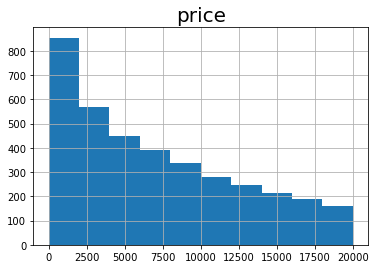

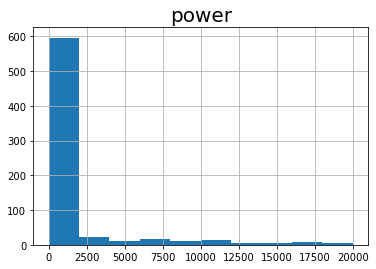

In [78]:
for col in ['price','power']:
    data.pivot_table(index = col, values = 'model', aggfunc = 'count').reset_index()\
         .hist(column = col,xlabelsize=10, ylabelsize = 10);
    plt.title(col,size=20)

In [79]:
data['price'].value_counts().sort_index(ascending=True)

0        9041
1         984
2          11
3           6
5          23
         ... 
19995      10
19997       1
19998       6
19999     271
20000     247
Name: price, Length: 3684, dtype: int64

По гистограммам видим, что есть аномальные значения в цене и мощности, например, те, которые равны 0 и мощность больше 1500 л.с. для представленных автомобилей также не реальна.

In [80]:
columns = ['vehicle_type', 'registration_year', 'gearbox',
         'kilometer', 'registration_month', 'fuel_type',
        'repaired']

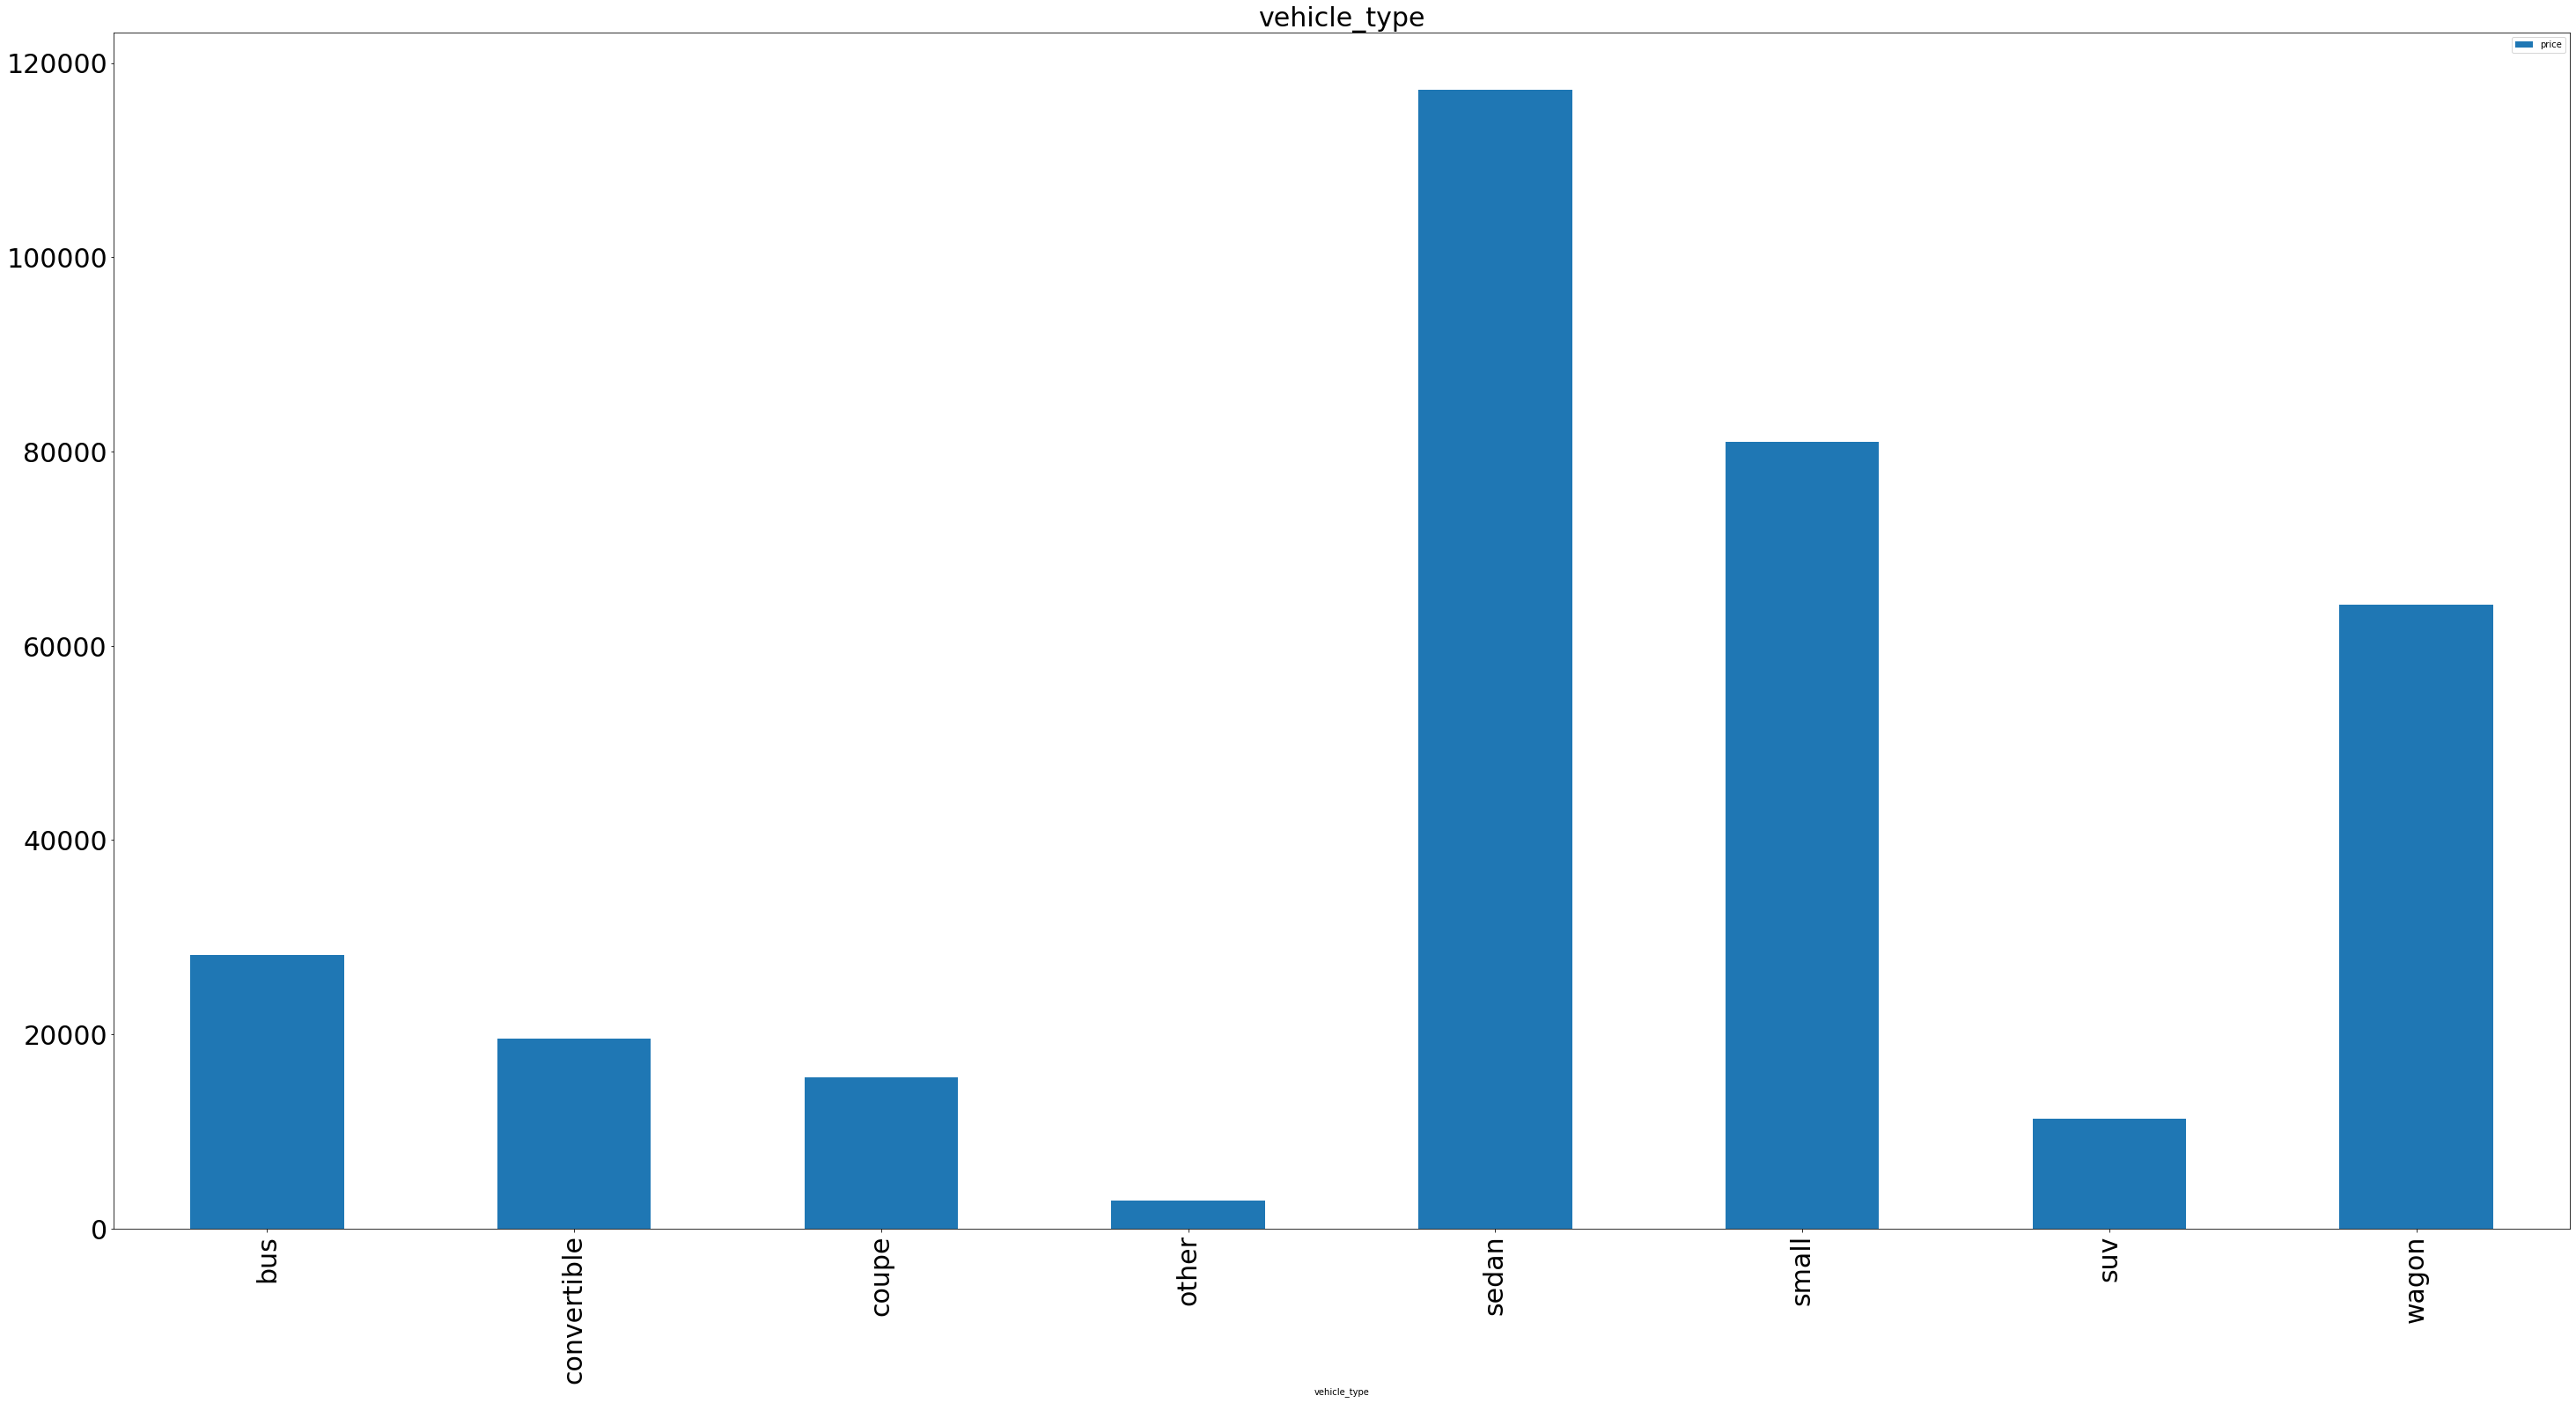

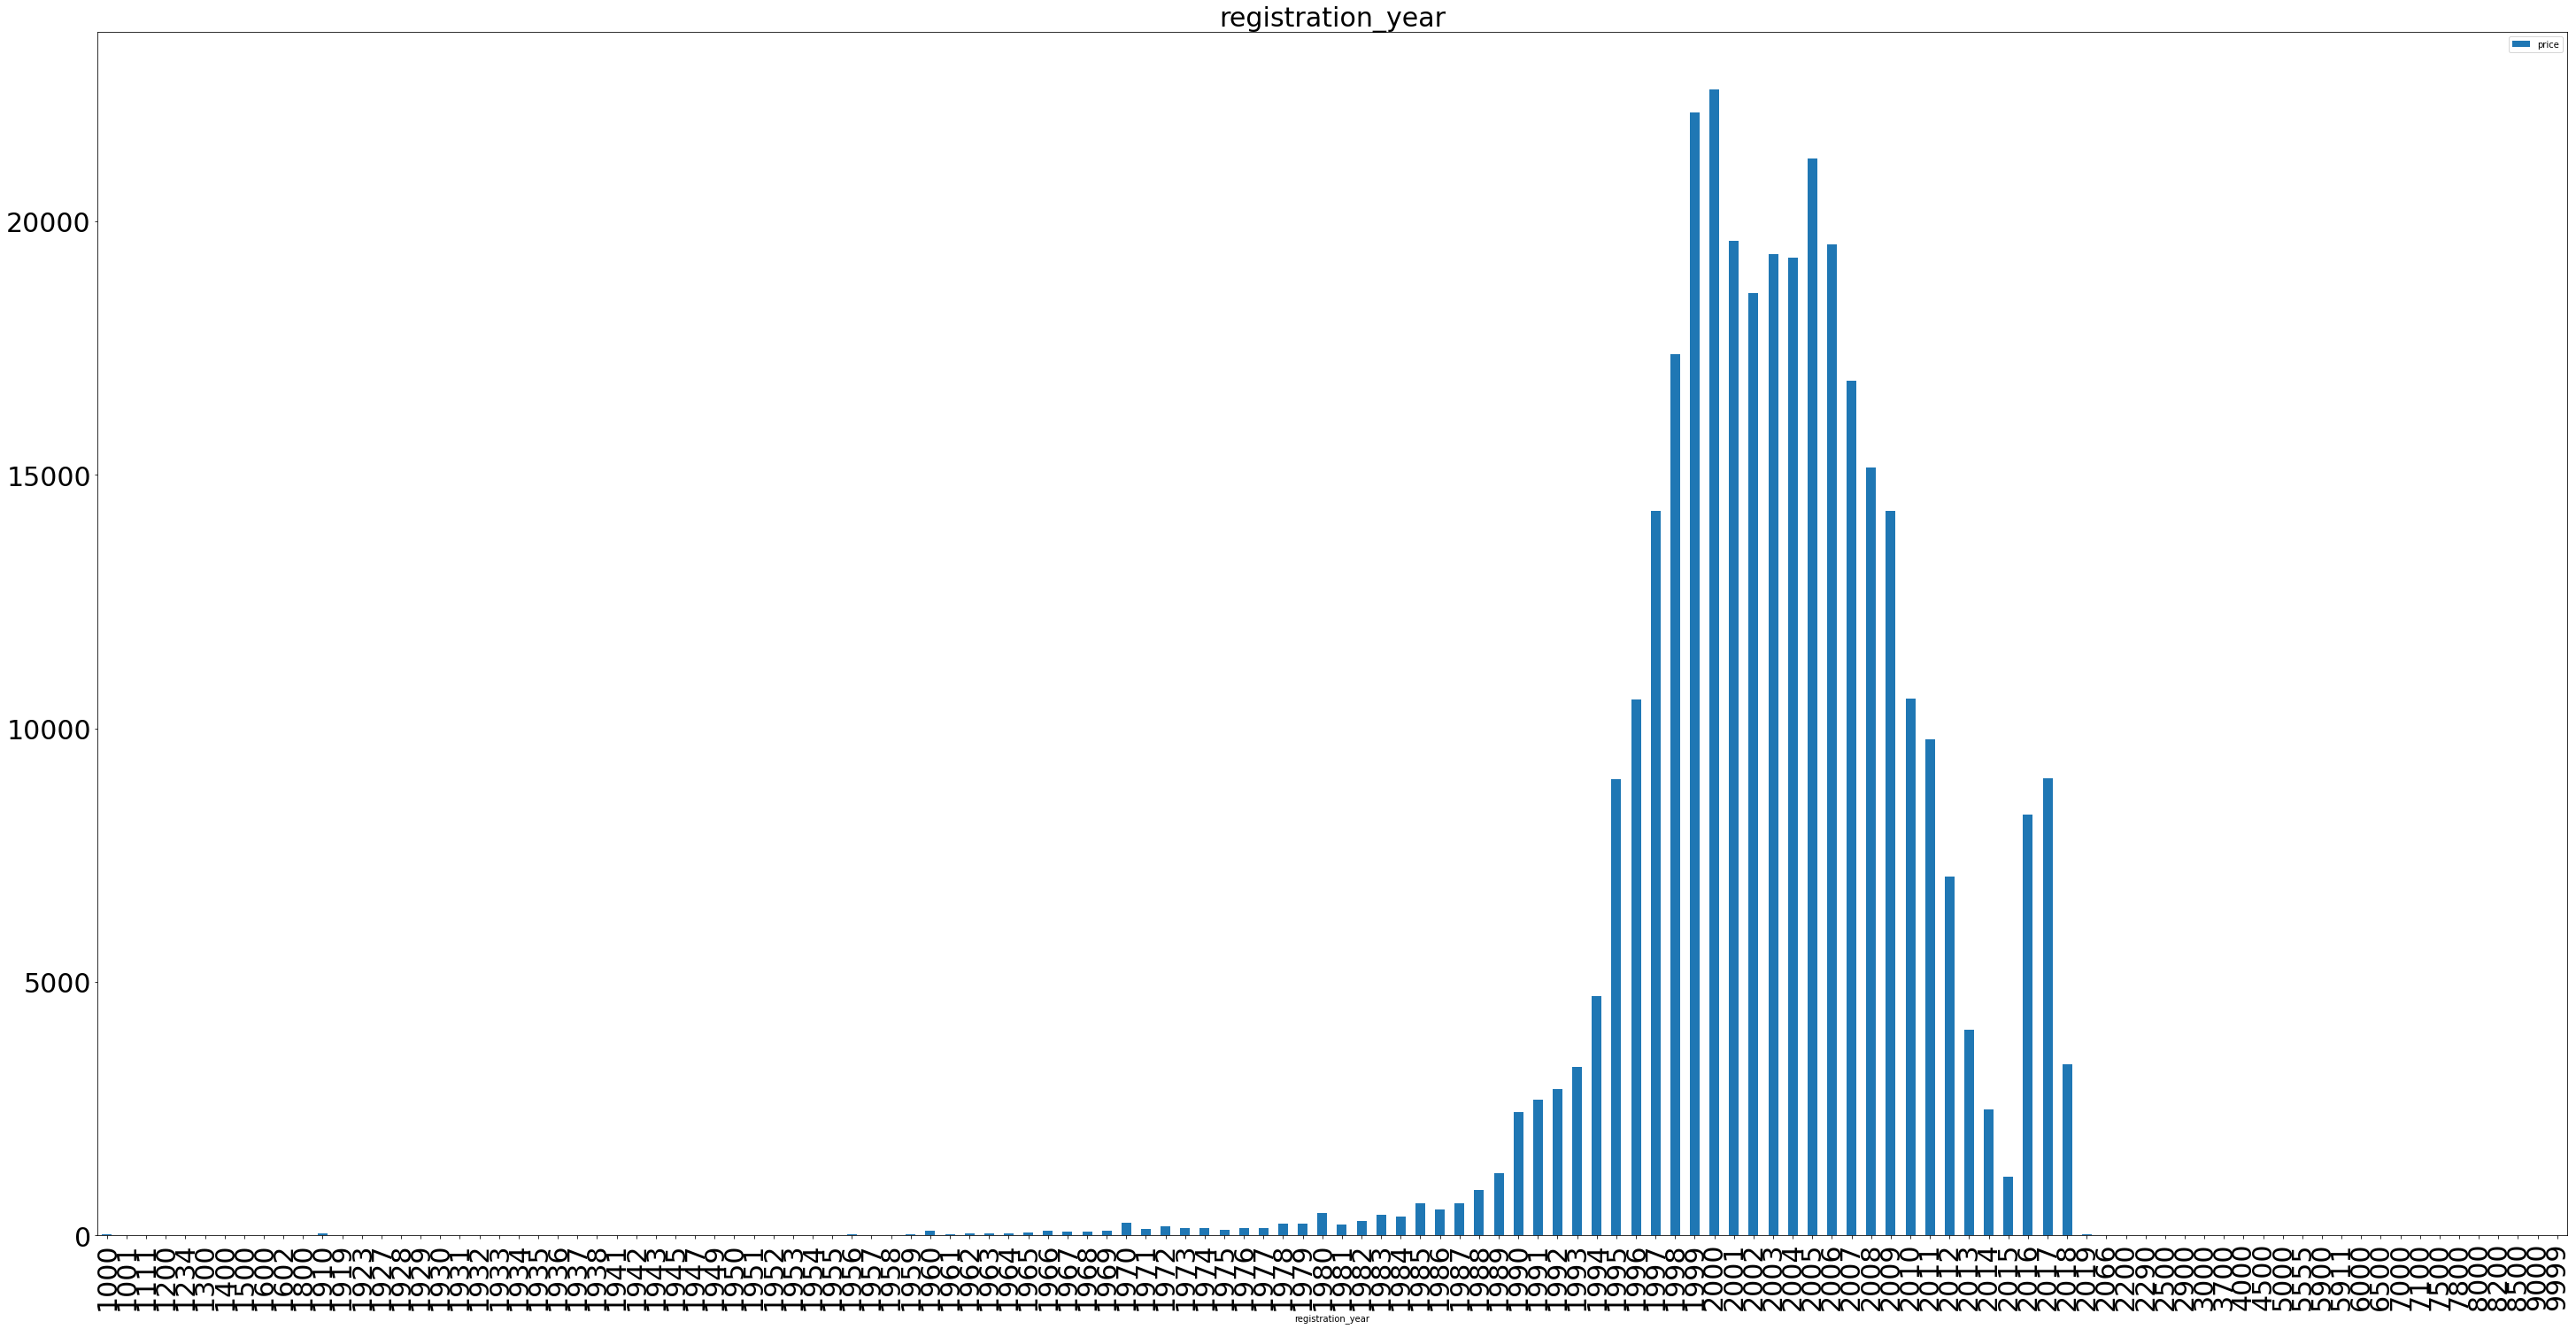

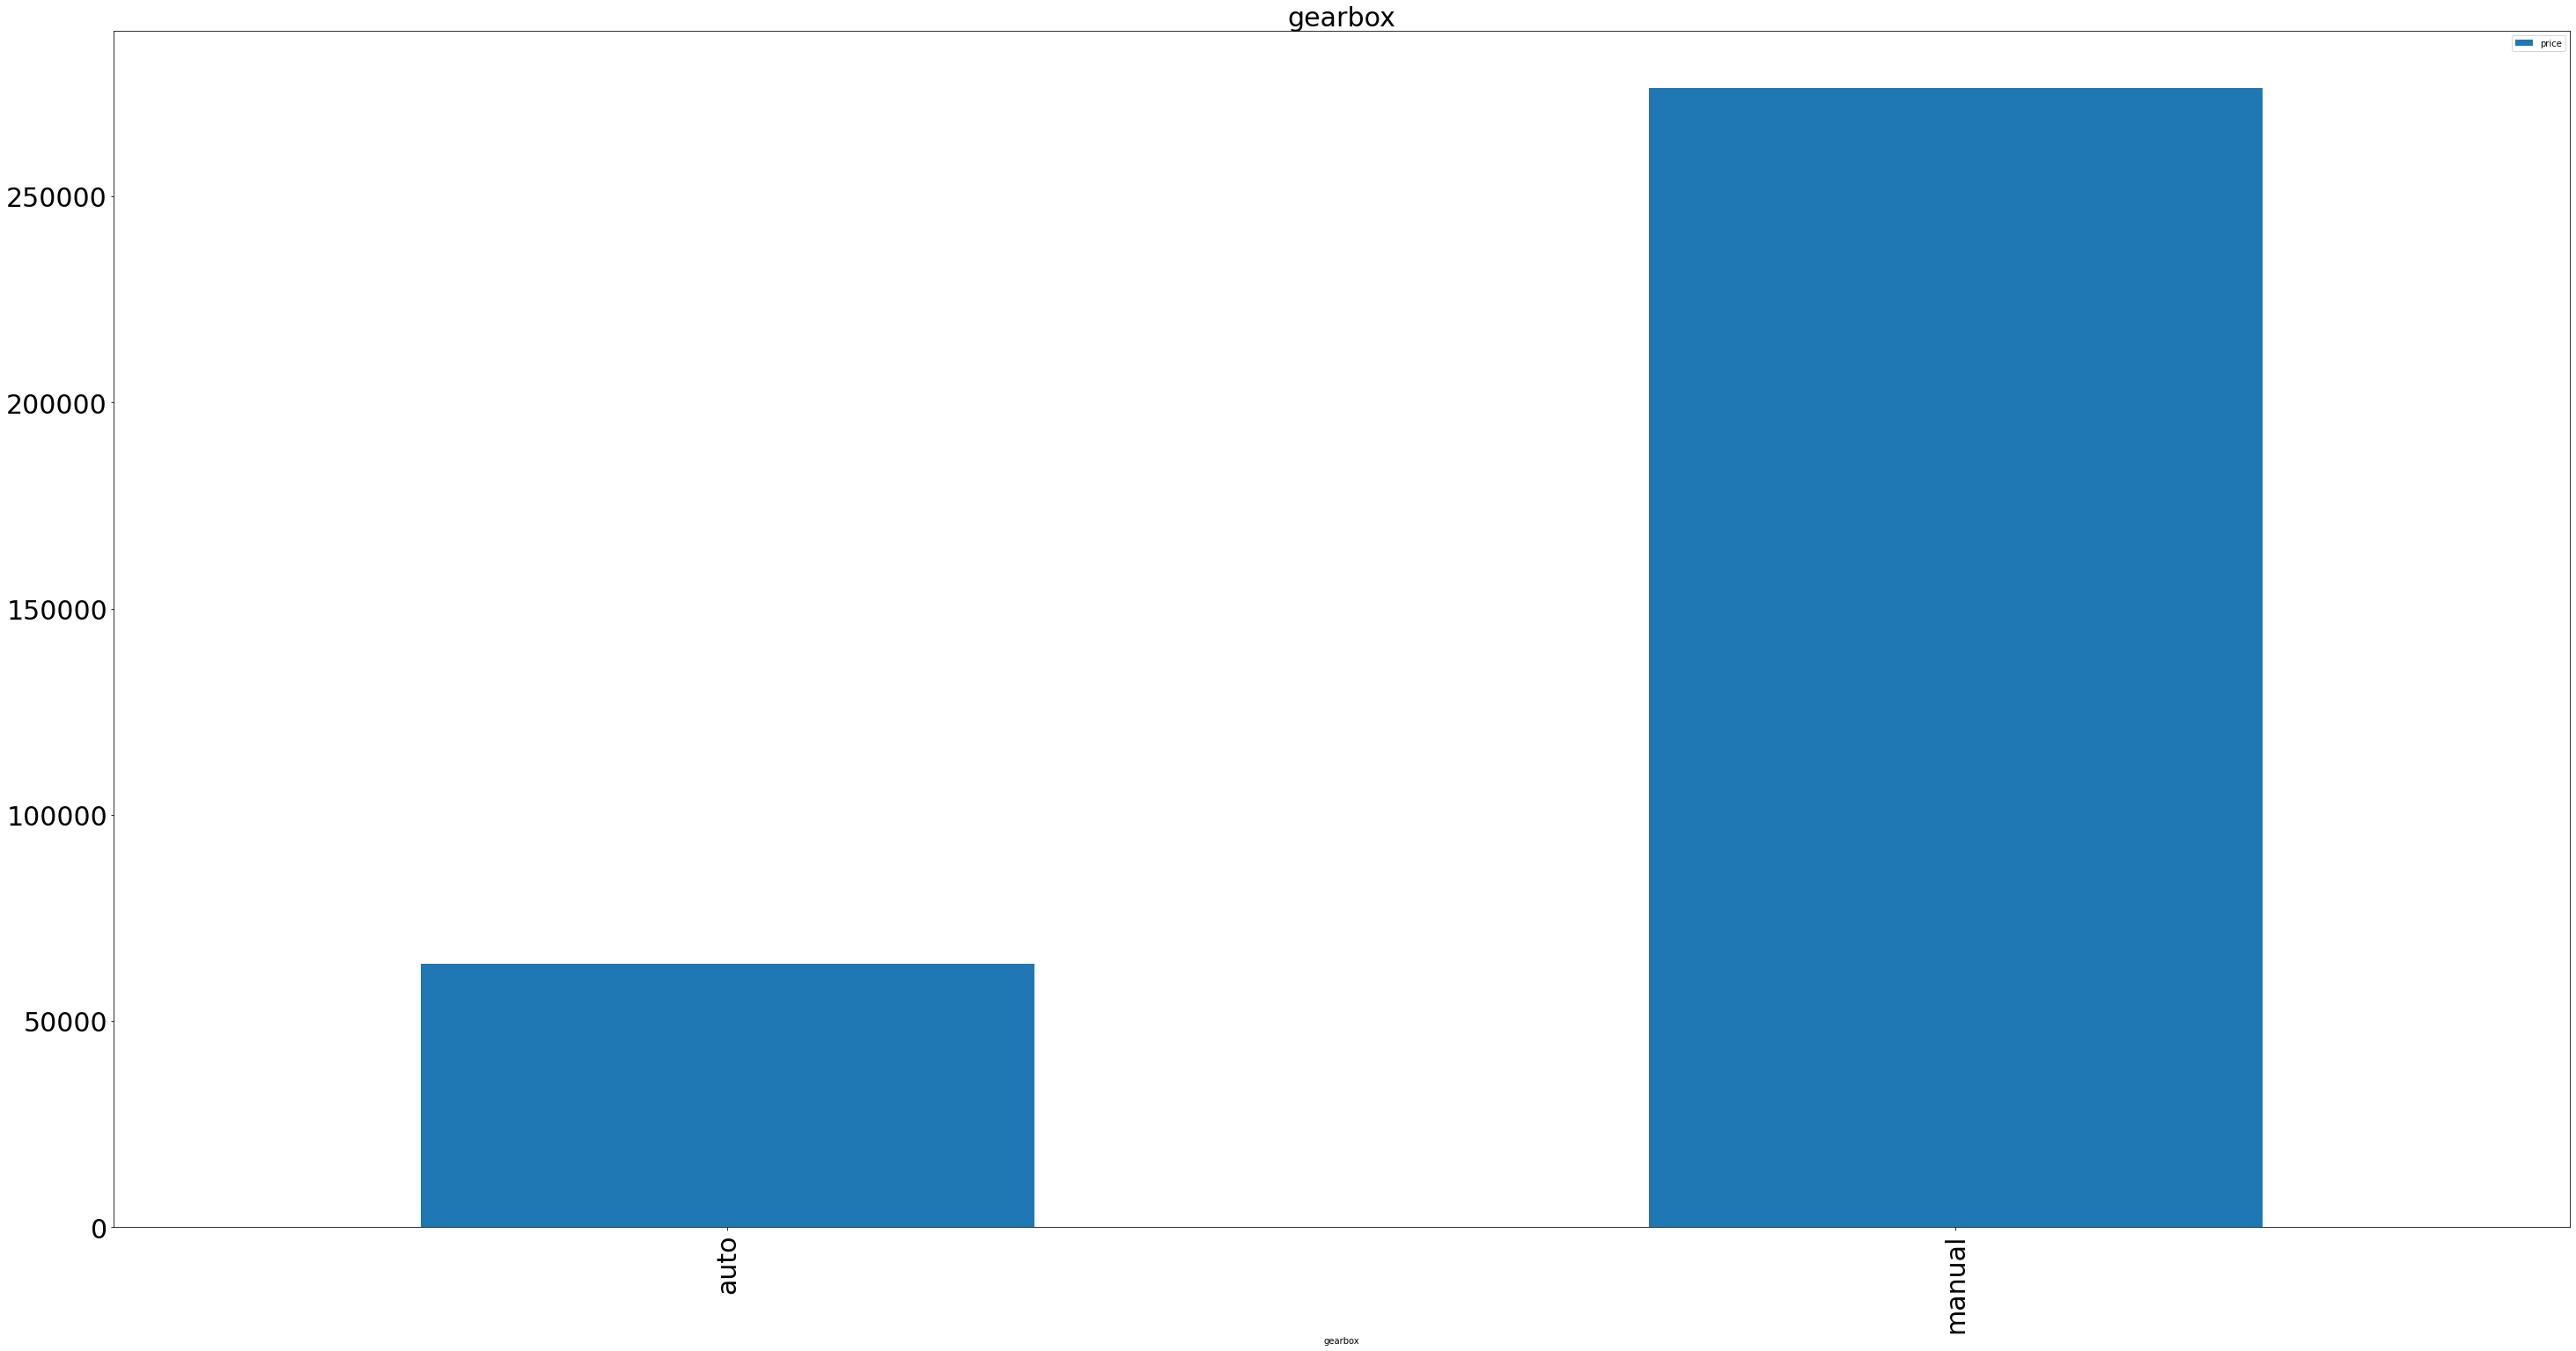

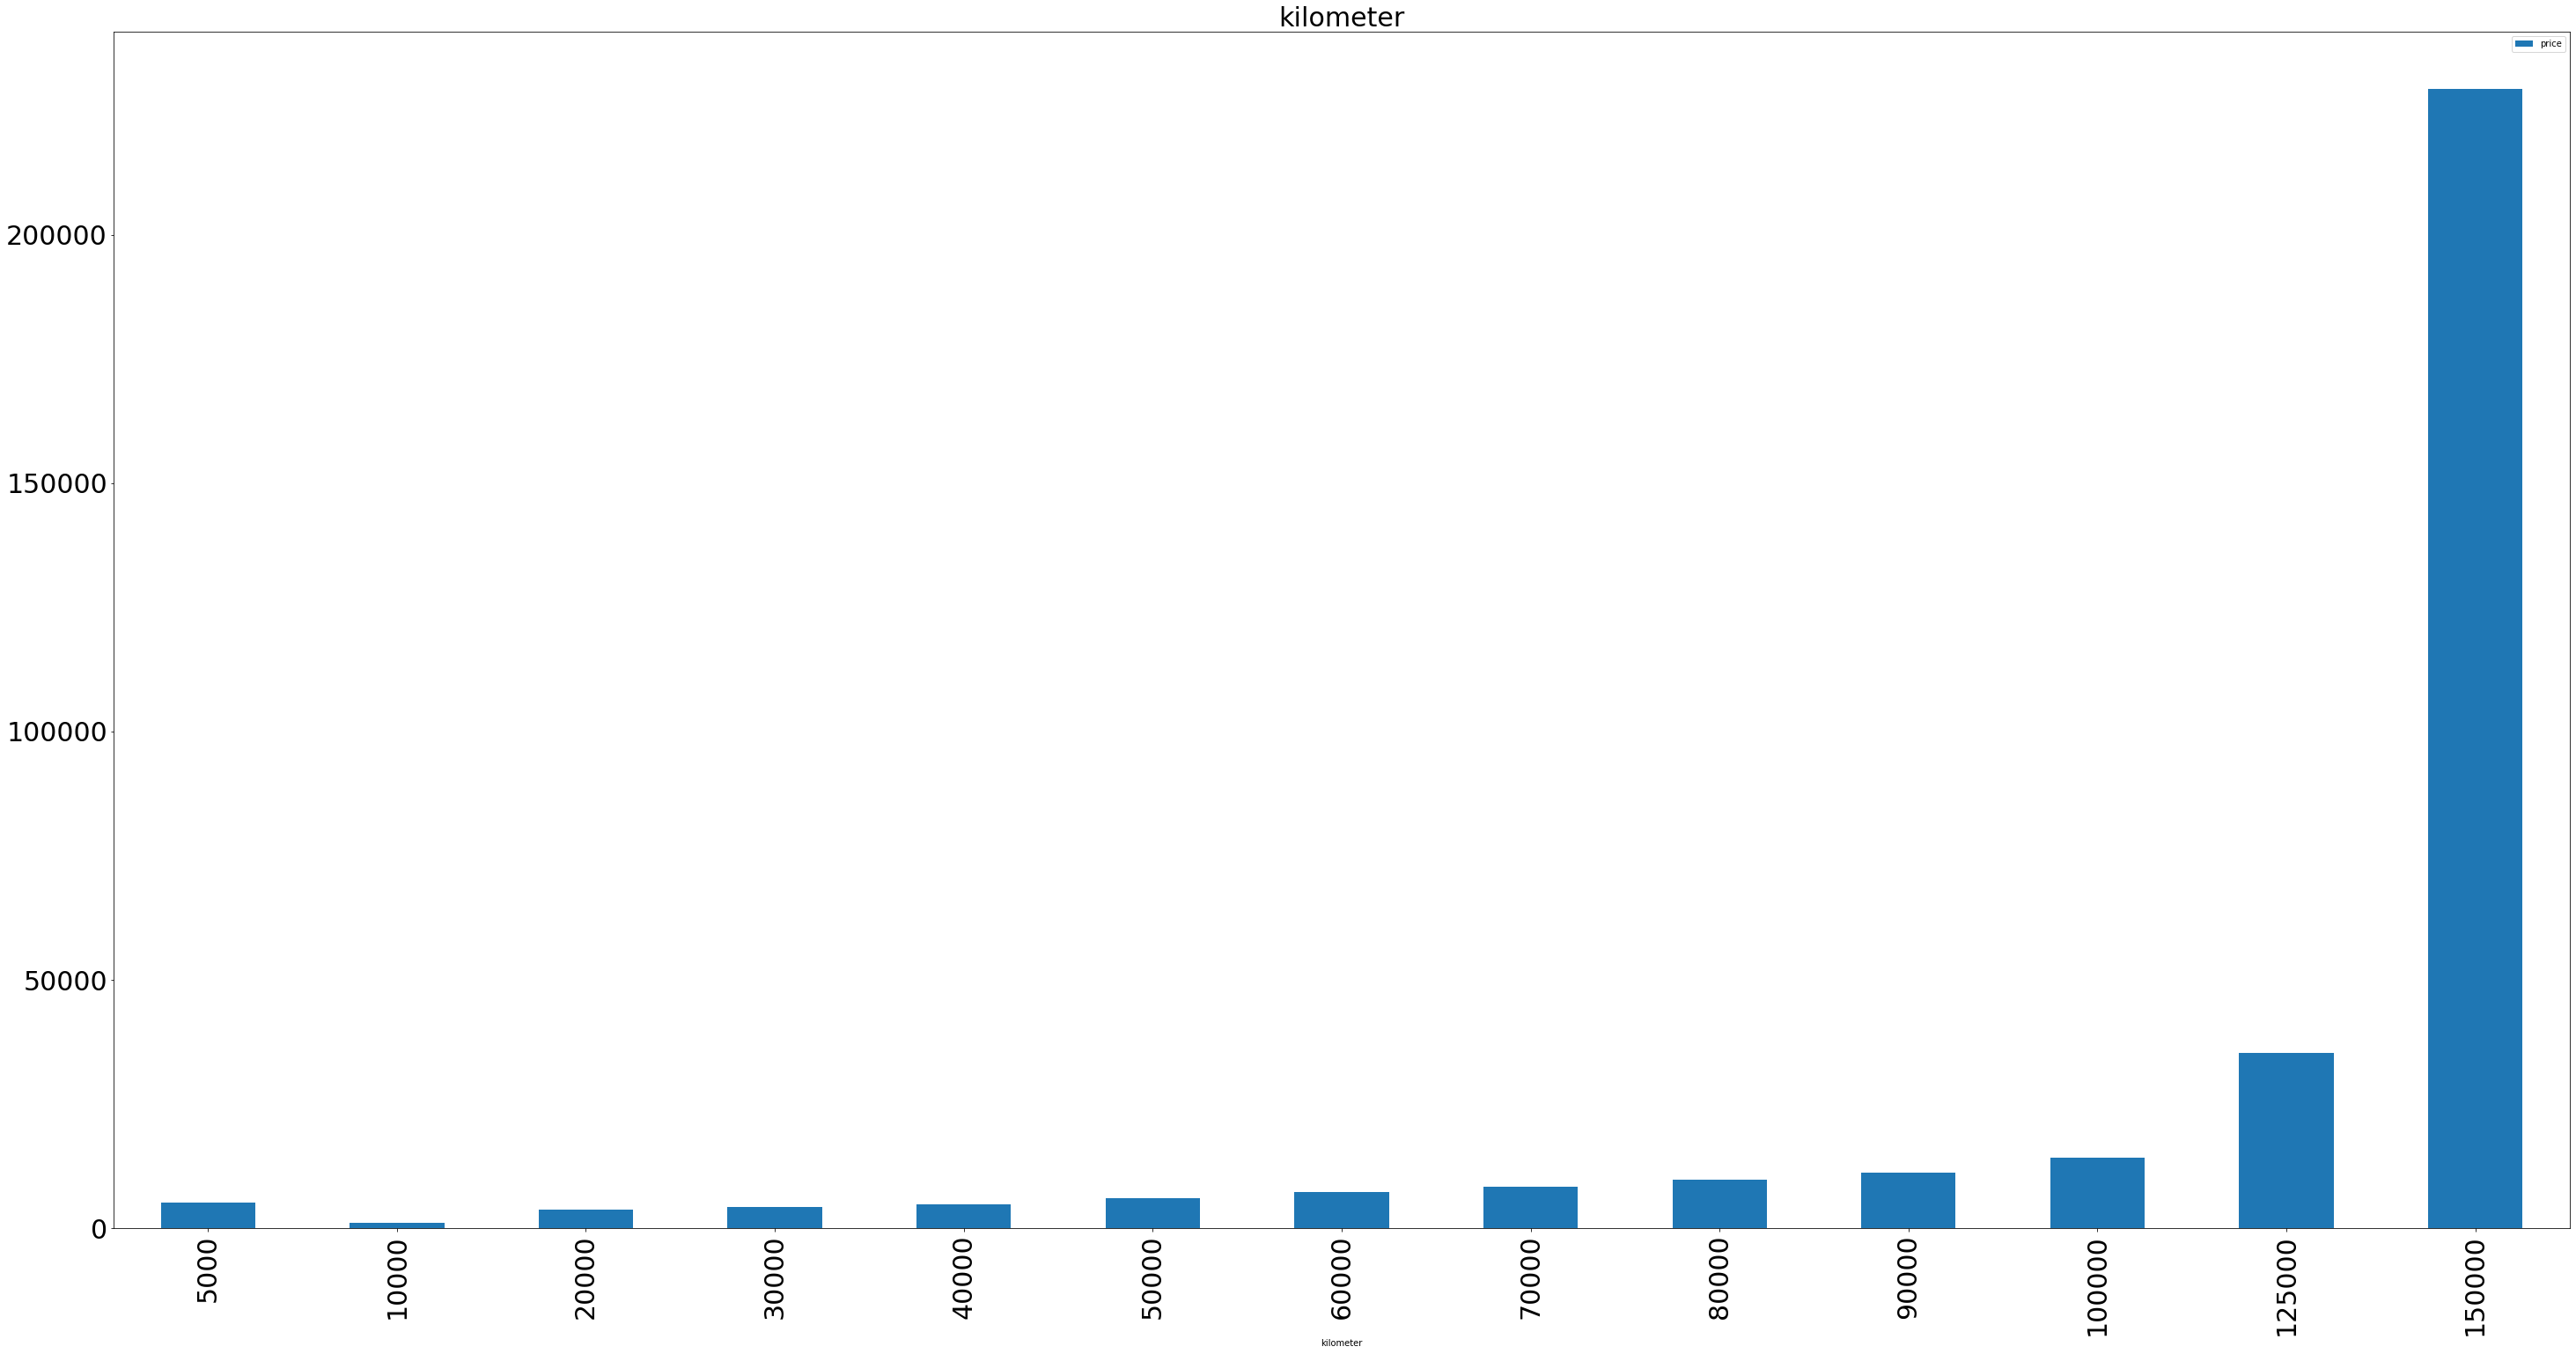

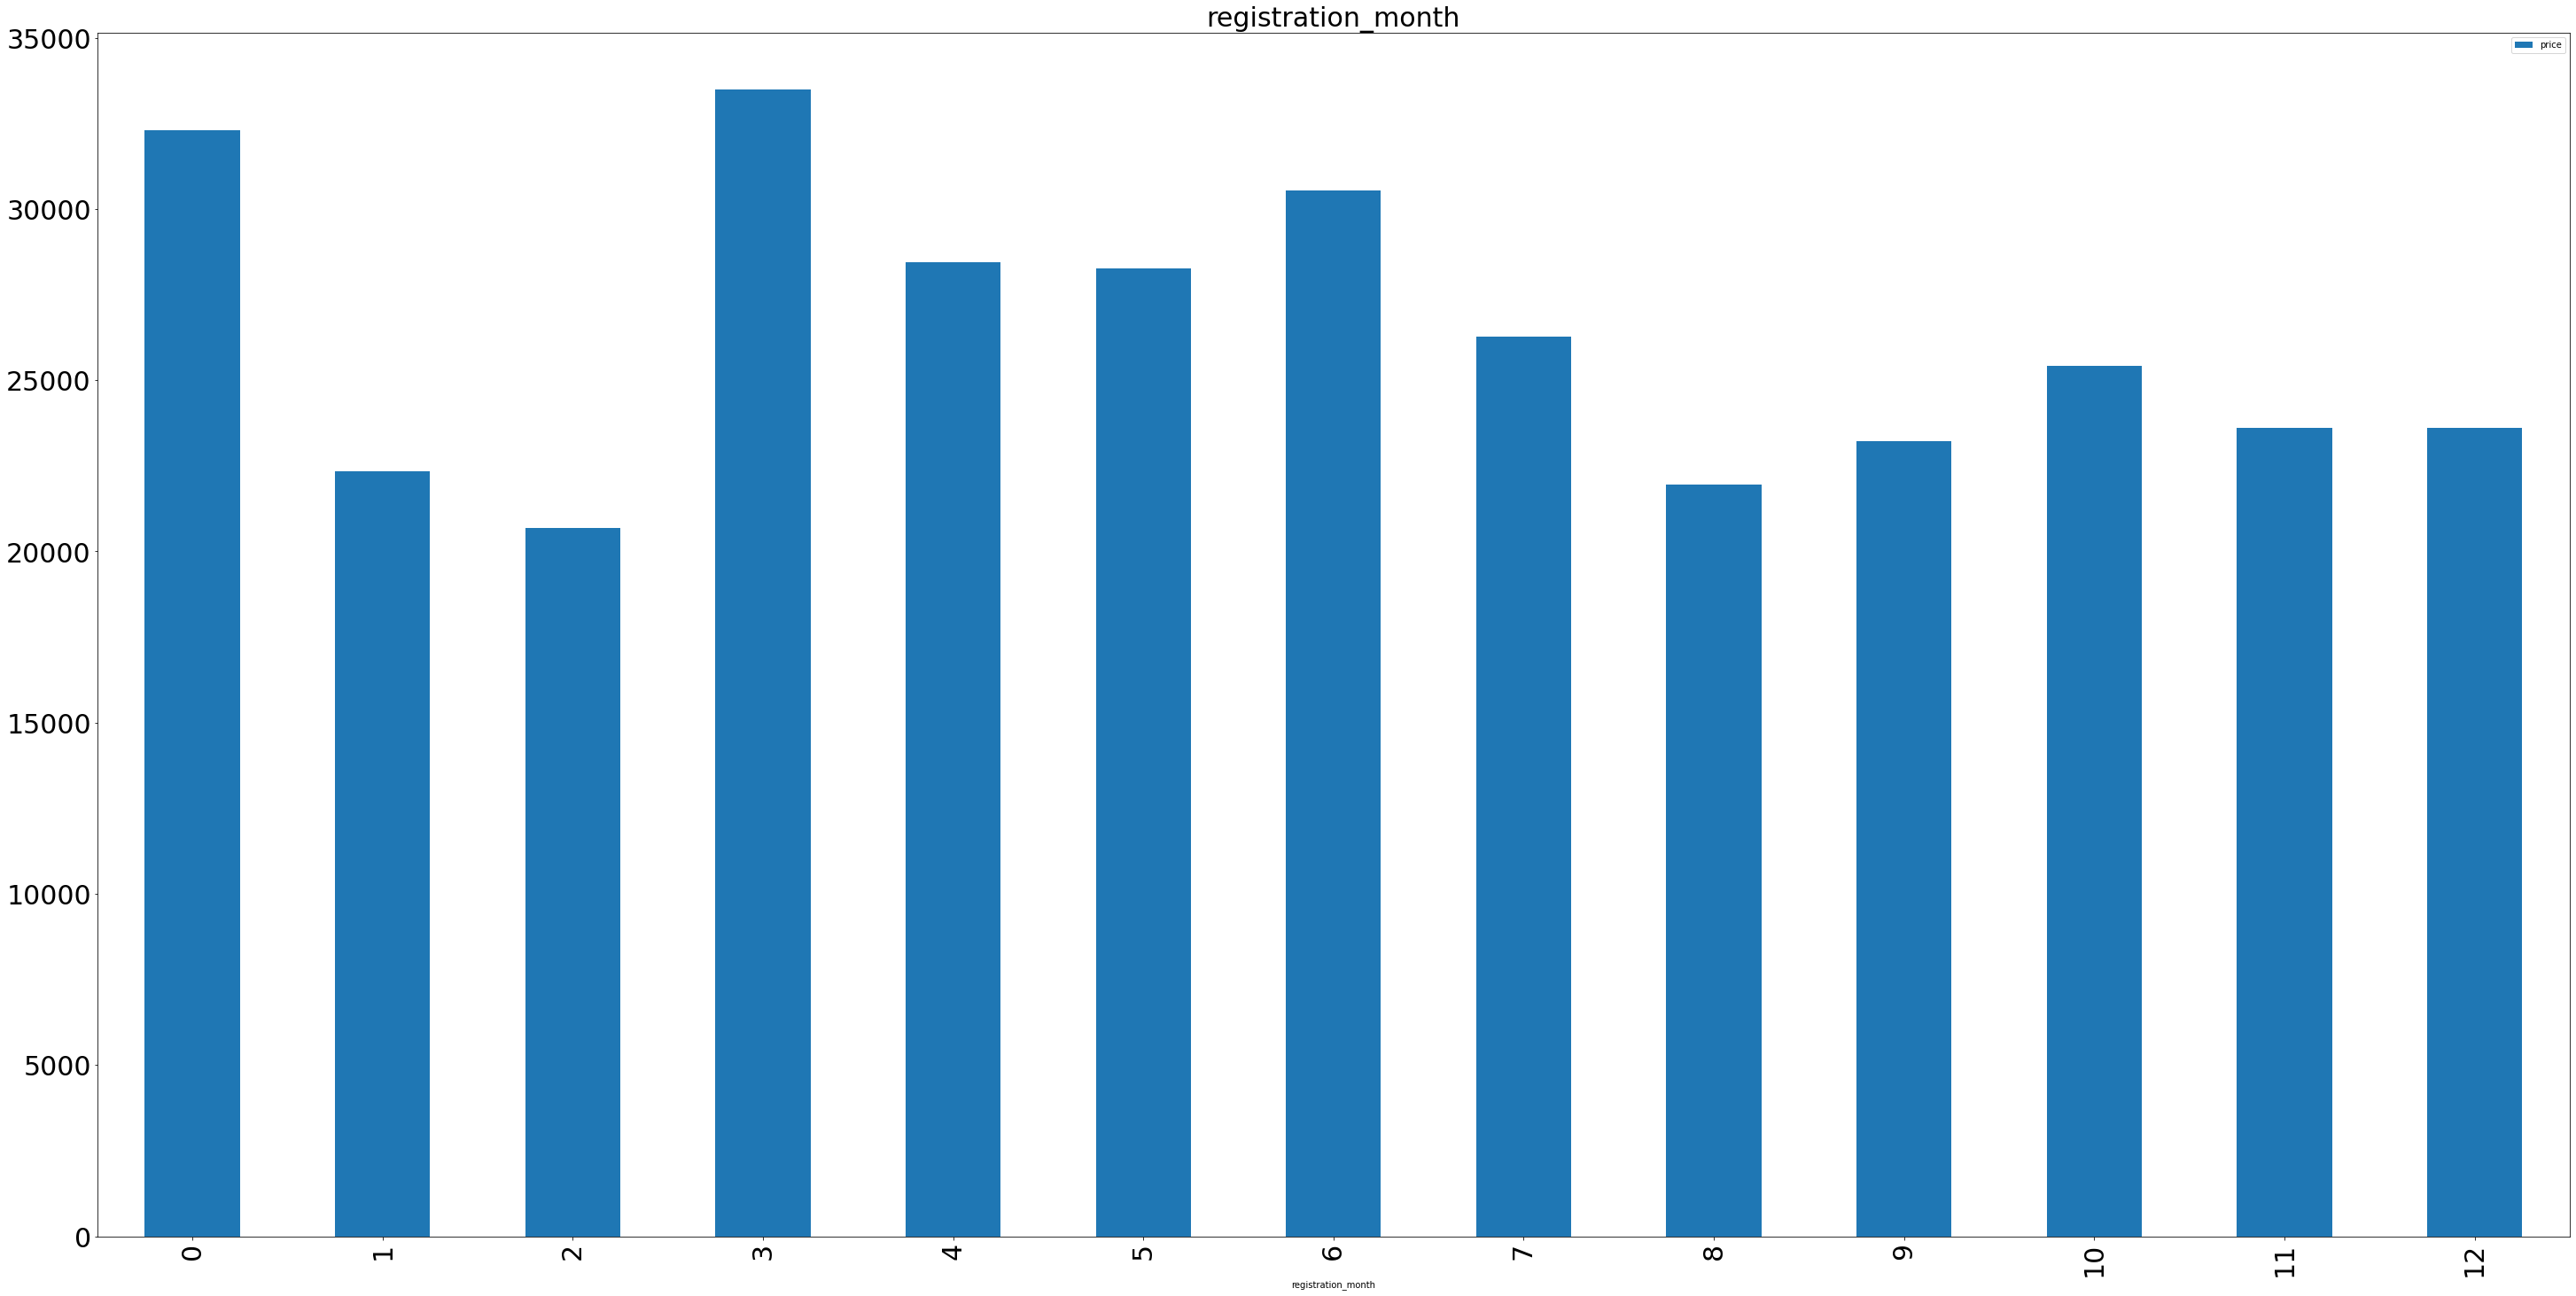

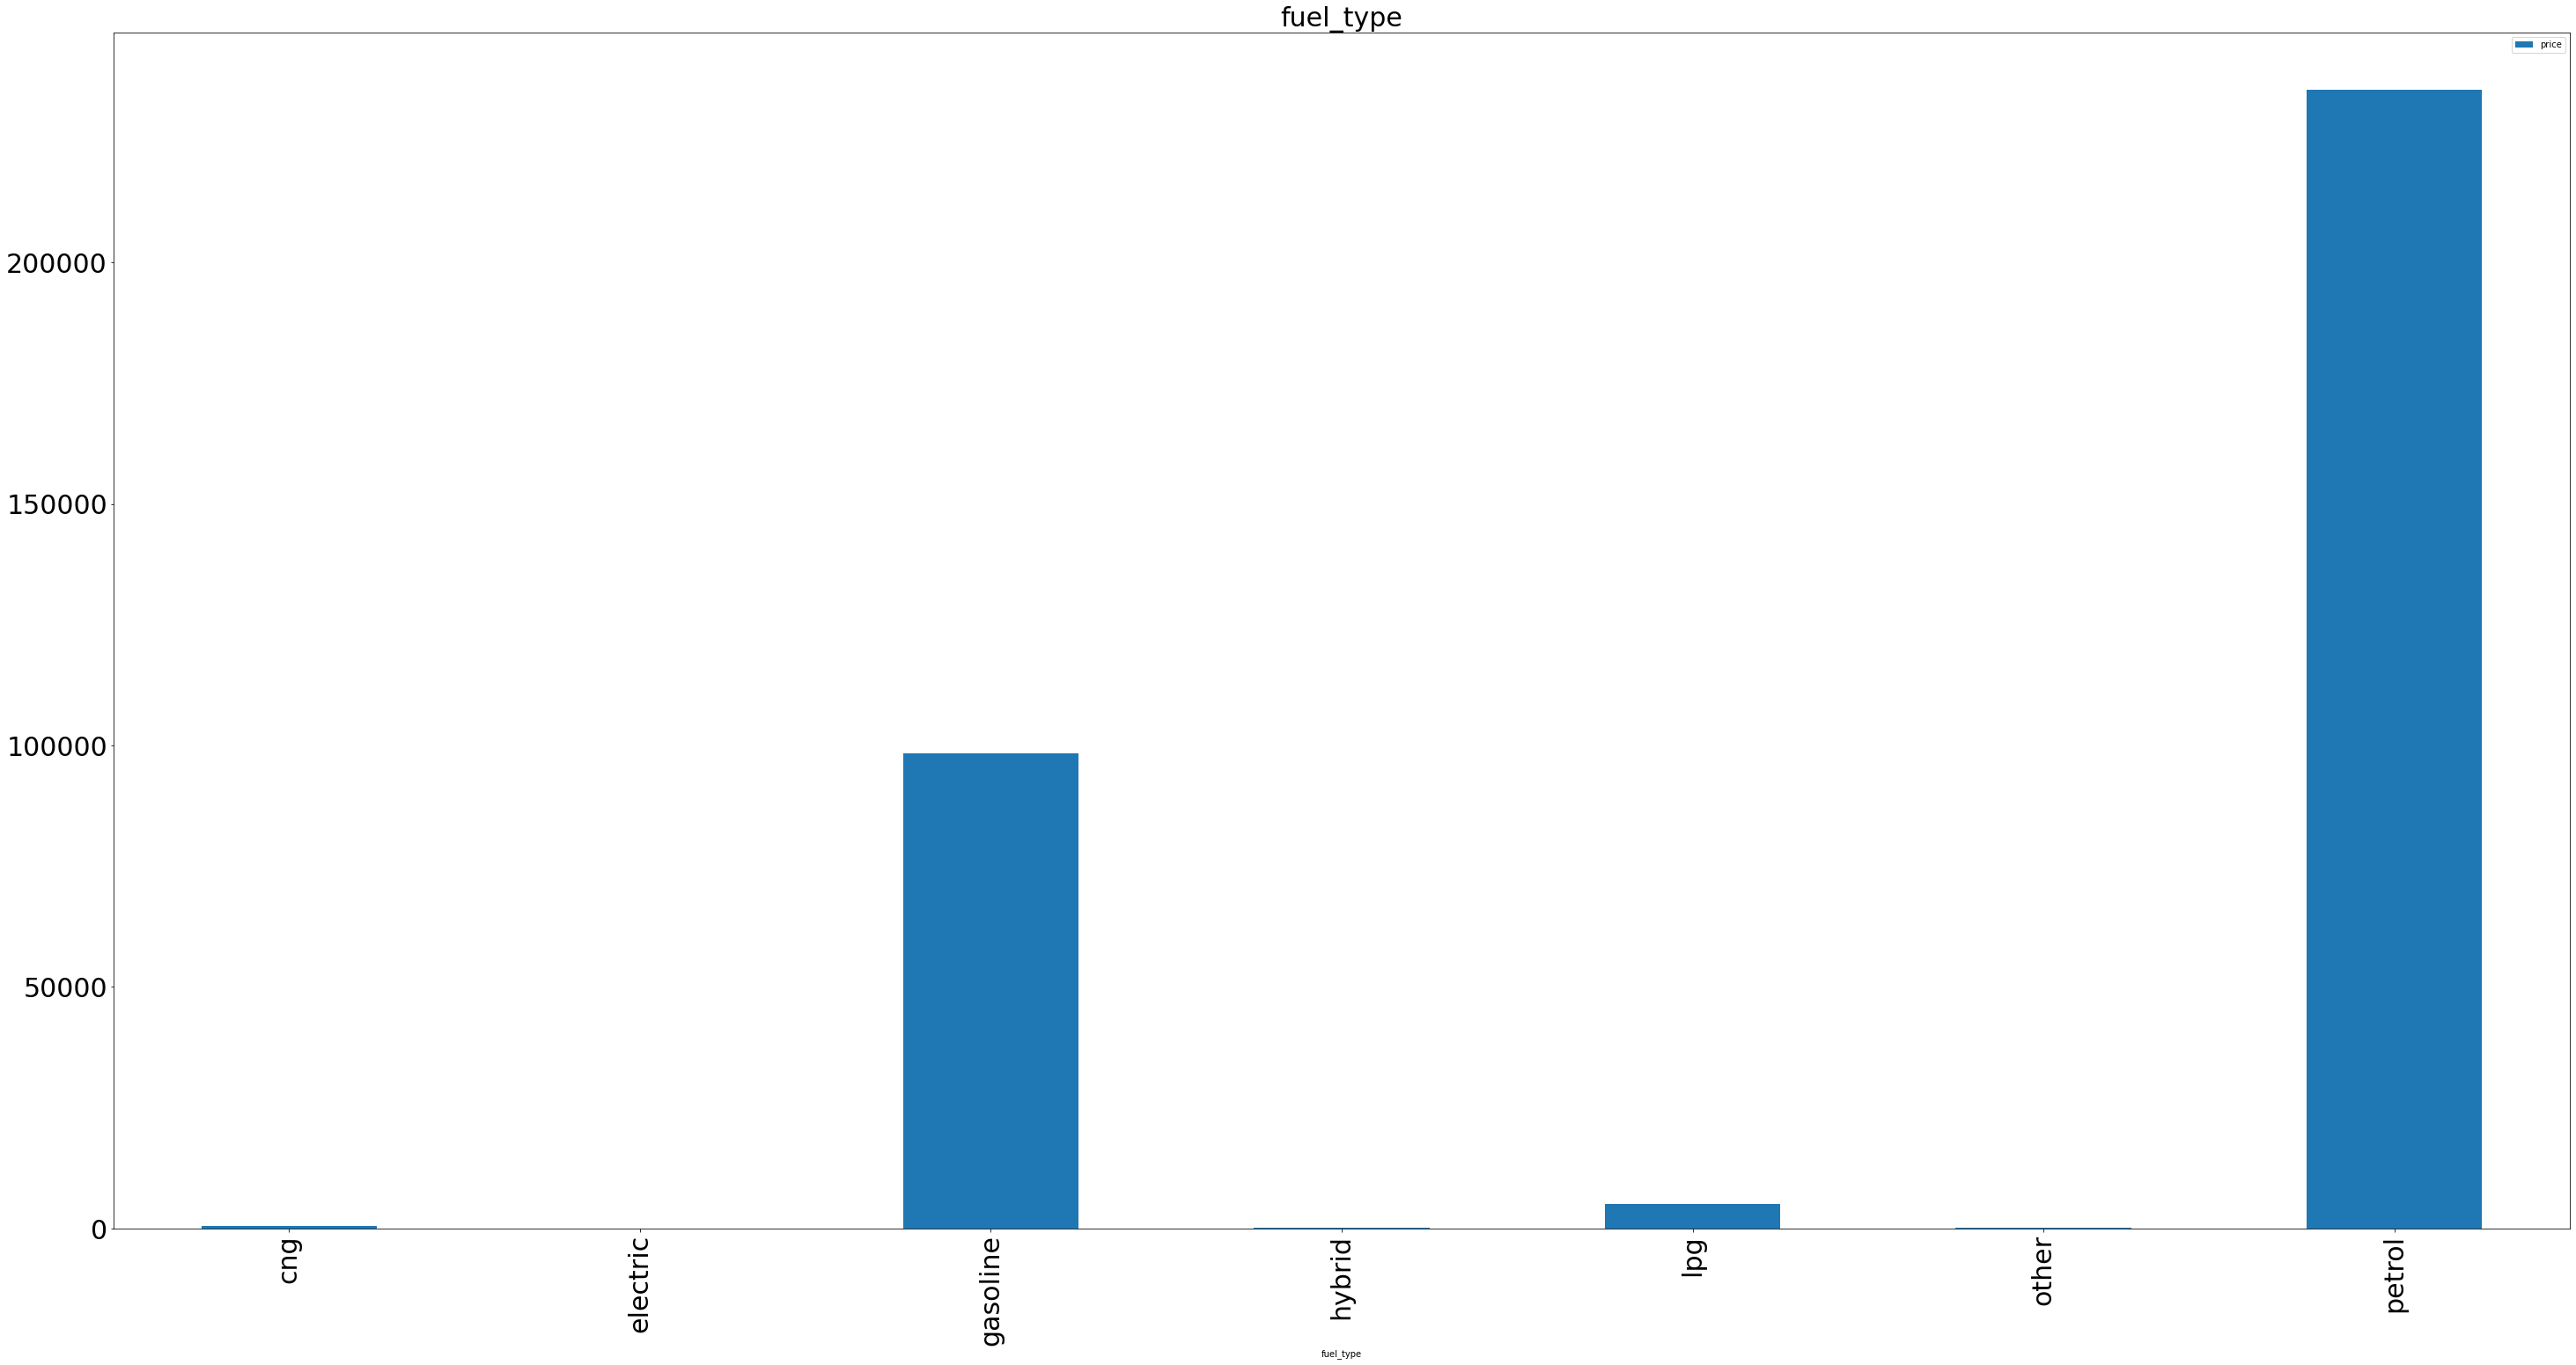

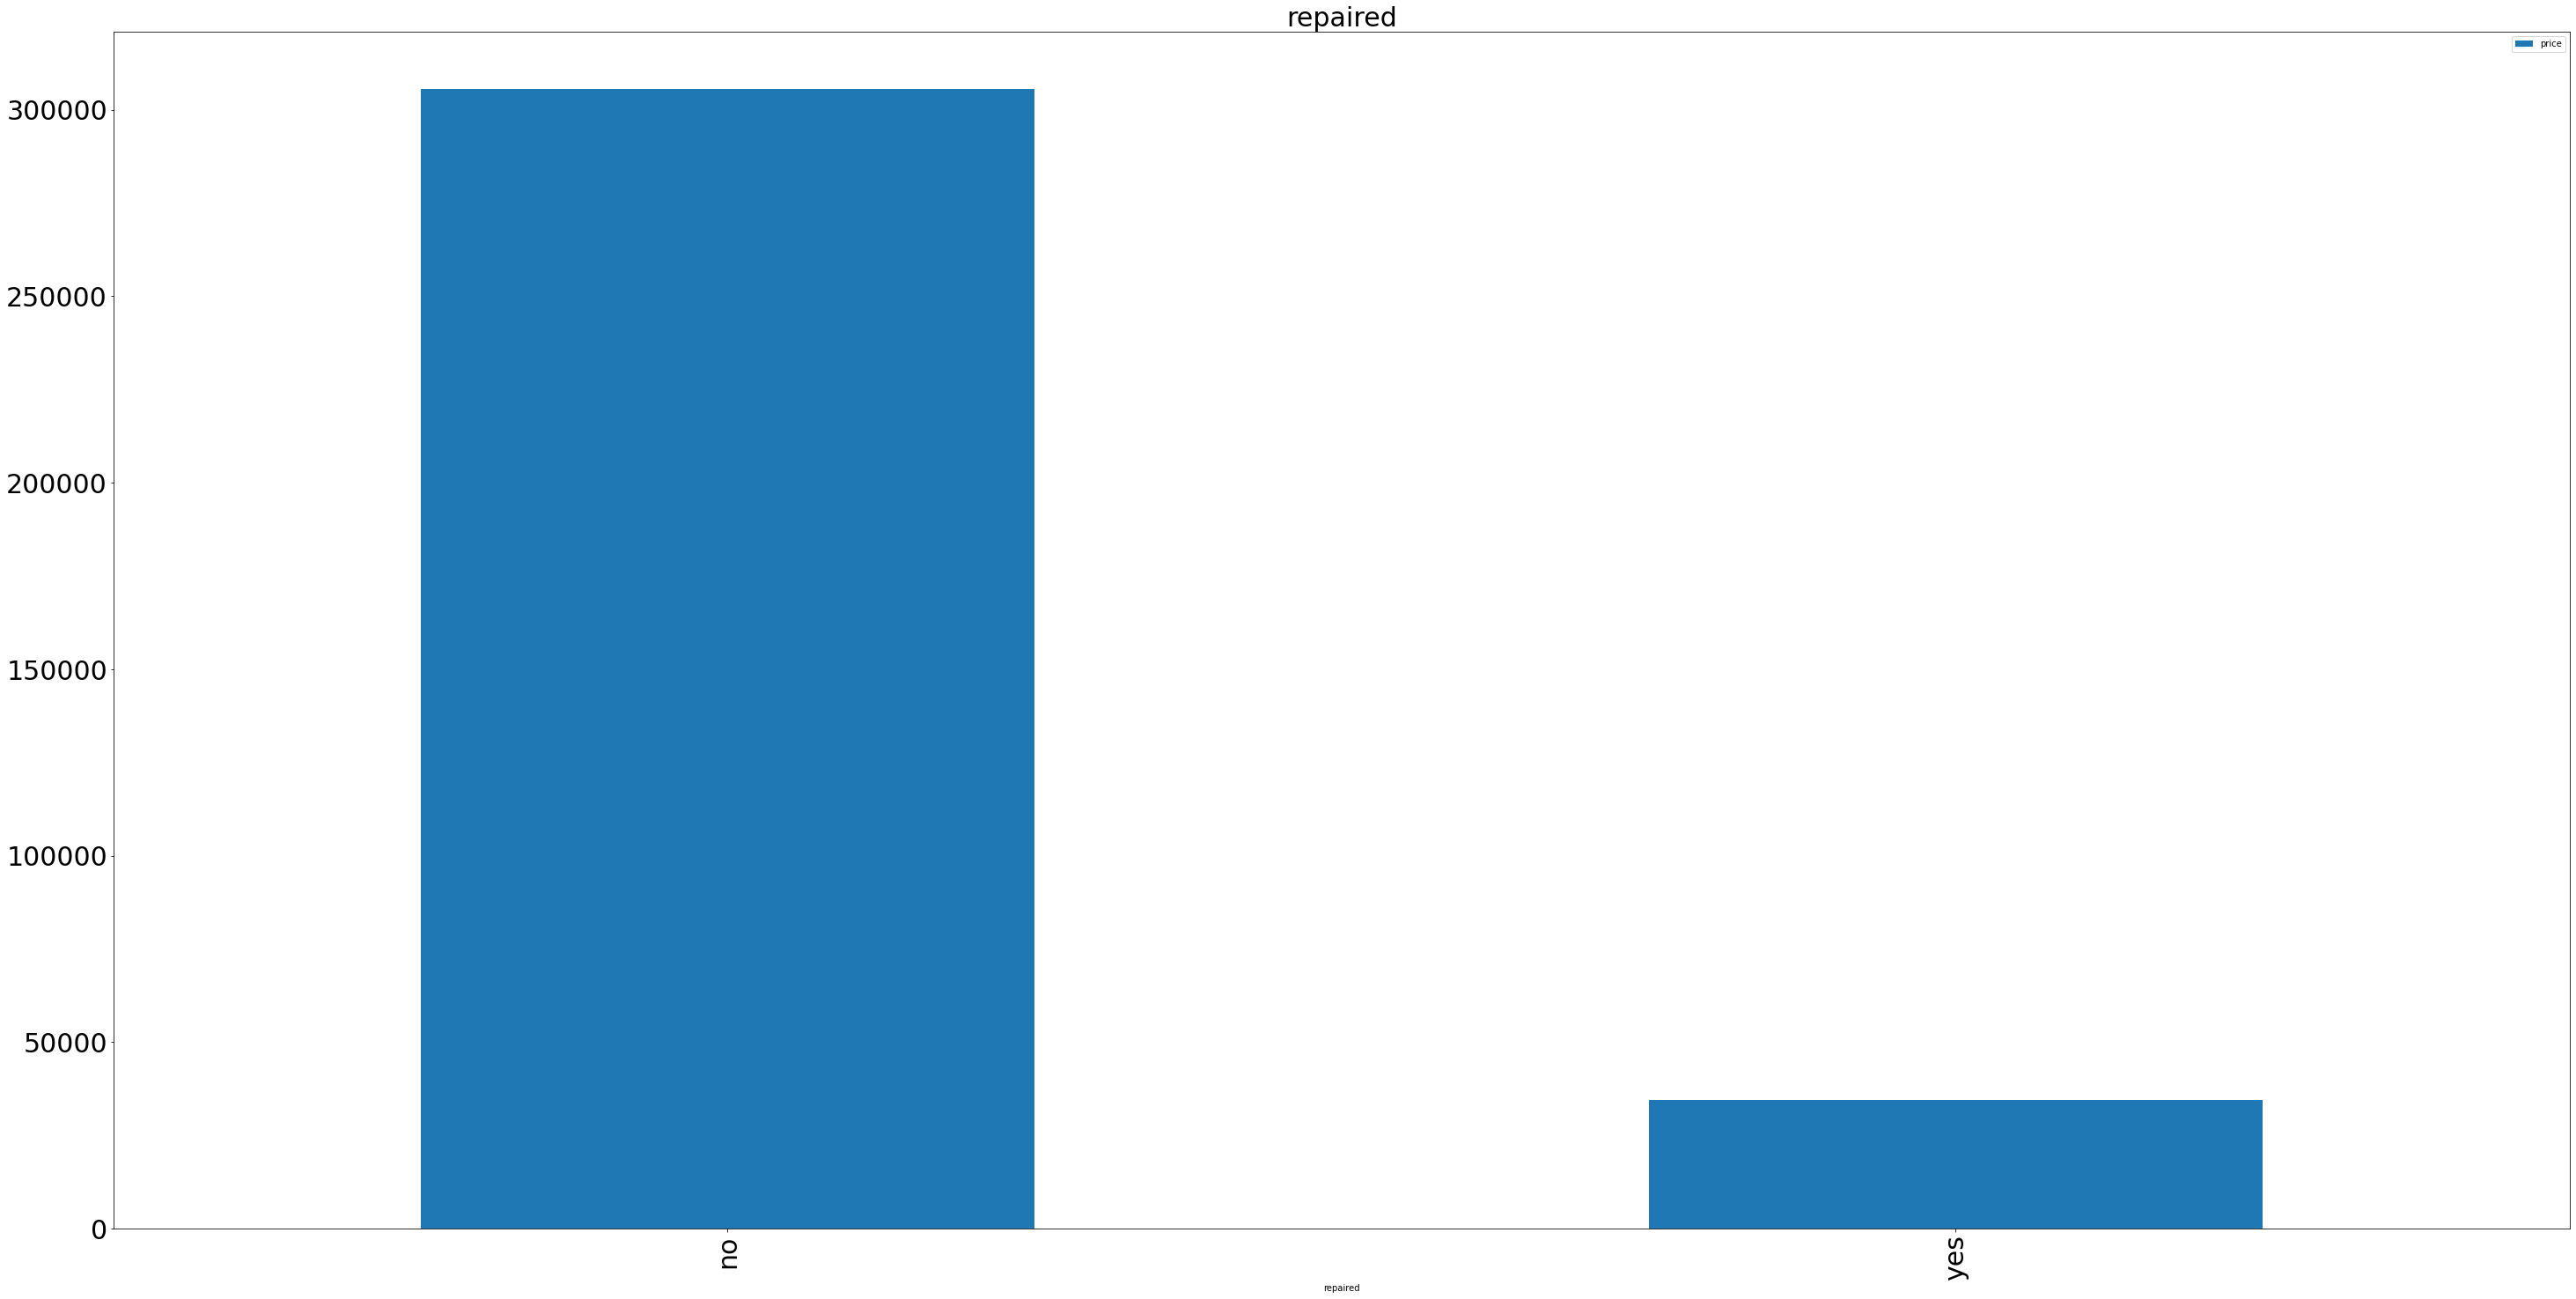

In [81]:
for col in columns:
    data.pivot_table(index = col, values = 'price', aggfunc = 'count').reset_index()\
        .plot(x = col, kind='bar',figsize=(50,25),fontsize=30);
    plt.title(col,size=30)

In [82]:
data.query('registration_year>date_crawled.dt.year')

,date_crawled,price,vehicle_type,registration_year,gearbox,power,model,kilometer,registration_month,fuel_type,brand,repaired,date_created,number_of_pictures,postal_code,last_seen
22,2016-03-23 14:52:51,2900,sedan,2018,manual,90,meriva,150000,5,petrol,opel,no,2016-03-23,0,49716,2016-03-31 01:16:33
26,2016-03-10 19:38:18,5555,sedan,2017,manual,125,c4,125000,4,petrol,citroen,no,2016-03-10,0,31139,2016-03-16 09:16:46
48,2016-03-25 14:40:12,7750,sedan,2017,manual,80,golf,100000,1,petrol,volkswagen,no,2016-03-25,0,48499,2016-03-31 21:47:44
51,2016-03-07 18:57:08,2000,sedan,2017,manual,90,punto,150000,11,gasoline,fiat,yes,2016-03-07,0,66115,2016-03-07 18:57:08
57,2016-03-10 20:53:19,2399,sedan,2018,manual,64,other,125000,3,petrol,seat,no,2016-03-10,0,33397,2016-03-25 10:17:37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354112,2016-03-11 15:49:51,3600,sedan,2017,manual,86,transit,150000,5,gasoline,ford,no,2016-03-11,0,32339,2016-03-12 05:45:02
354140,2016-03-29 16:47:29,1000,sedan,2017,manual,101,a4,150000,9,gasoline,audi,no,2016-03-29,0,38315,2016-04-06 02:44:27
354203,2016-03-17 00:56:26,2140,sedan,2018,manual,80,fiesta,150000,6,petrol,ford,no,2016-03-17,0,44866,2016-03-29 15:45:04
354253,2016-03-25 09:37:59,1250,small,2018,manual,0,corsa,150000,0,petrol,opel,no,2016-03-25,0,45527,2016-04-06 07:46:13


Также удалим года регистрации с нижней границей раньше 1990, верхнюю границу заменим на год выгрузки объявления, месяц равный 0 заменим на 'unknown'.

In [83]:
data['registration_year'].max()

9999

In [84]:
data['registration_year'].value_counts().sort_index(ascending=True)

1000    17
1001     1
1111     1
1200     1
1234     2
        ..
8000     2
8200     1
8500     1
9000     2
9999    14
Name: registration_year, Length: 126, dtype: int64

In [85]:
data.loc[data['registration_year']>data['date_crawled'].dt.year, 'registration_year'] = data['date_crawled'].dt.year

In [86]:
data['registration_year'].value_counts().sort_index(ascending=True)

1000       17
1001        1
1111        1
1200        1
1234        2
        ...  
2012     7074
2013     4063
2014     2487
2015     1163
2016    20783
Name: registration_year, Length: 99, dtype: int64

In [87]:
data['registration_month'].value_counts().sort_index(ascending=True)

0     32289
1     22350
2     20675
3     33479
4     28437
5     28271
6     30538
7     26275
8     21946
9     23223
10    25426
11    23597
12    23604
Name: registration_month, dtype: int64

In [88]:
data.loc[data['registration_month'] ==0,'registration_month'] = pd.Series(np.random.randint(1,13,size=len(data)), index = data.index)

In [89]:
data['registration_month'].value_counts()

3     36187
6     33228
4     31169
5     30995
7     28960
10    28099
11    26353
12    26313
9     25911
1     24953
8     24638
2     23304
Name: registration_month, dtype: int64

In [90]:
data = data[(data['price'] >= 1000)&\
           (data['registration_year'] > 1989)&\
           (data['power'] > 49)&(data['power'] < 1501)]

In [91]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 237358 entries, 1 to 354368
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   date_crawled        237358 non-null  datetime64[ns]
 1   price               237358 non-null  int64         
 2   vehicle_type        237358 non-null  object        
 3   registration_year   237358 non-null  int64         
 4   gearbox             237358 non-null  object        
 5   power               237358 non-null  int64         
 6   model               237358 non-null  object        
 7   kilometer           237358 non-null  int64         
 8   registration_month  237358 non-null  int64         
 9   fuel_type           237358 non-null  object        
 10  brand               237358 non-null  object        
 11  repaired            237358 non-null  object        
 12  date_created        237358 non-null  datetime64[ns]
 13  number_of_pictures  237358 no

### Удаление неинформативных признаков

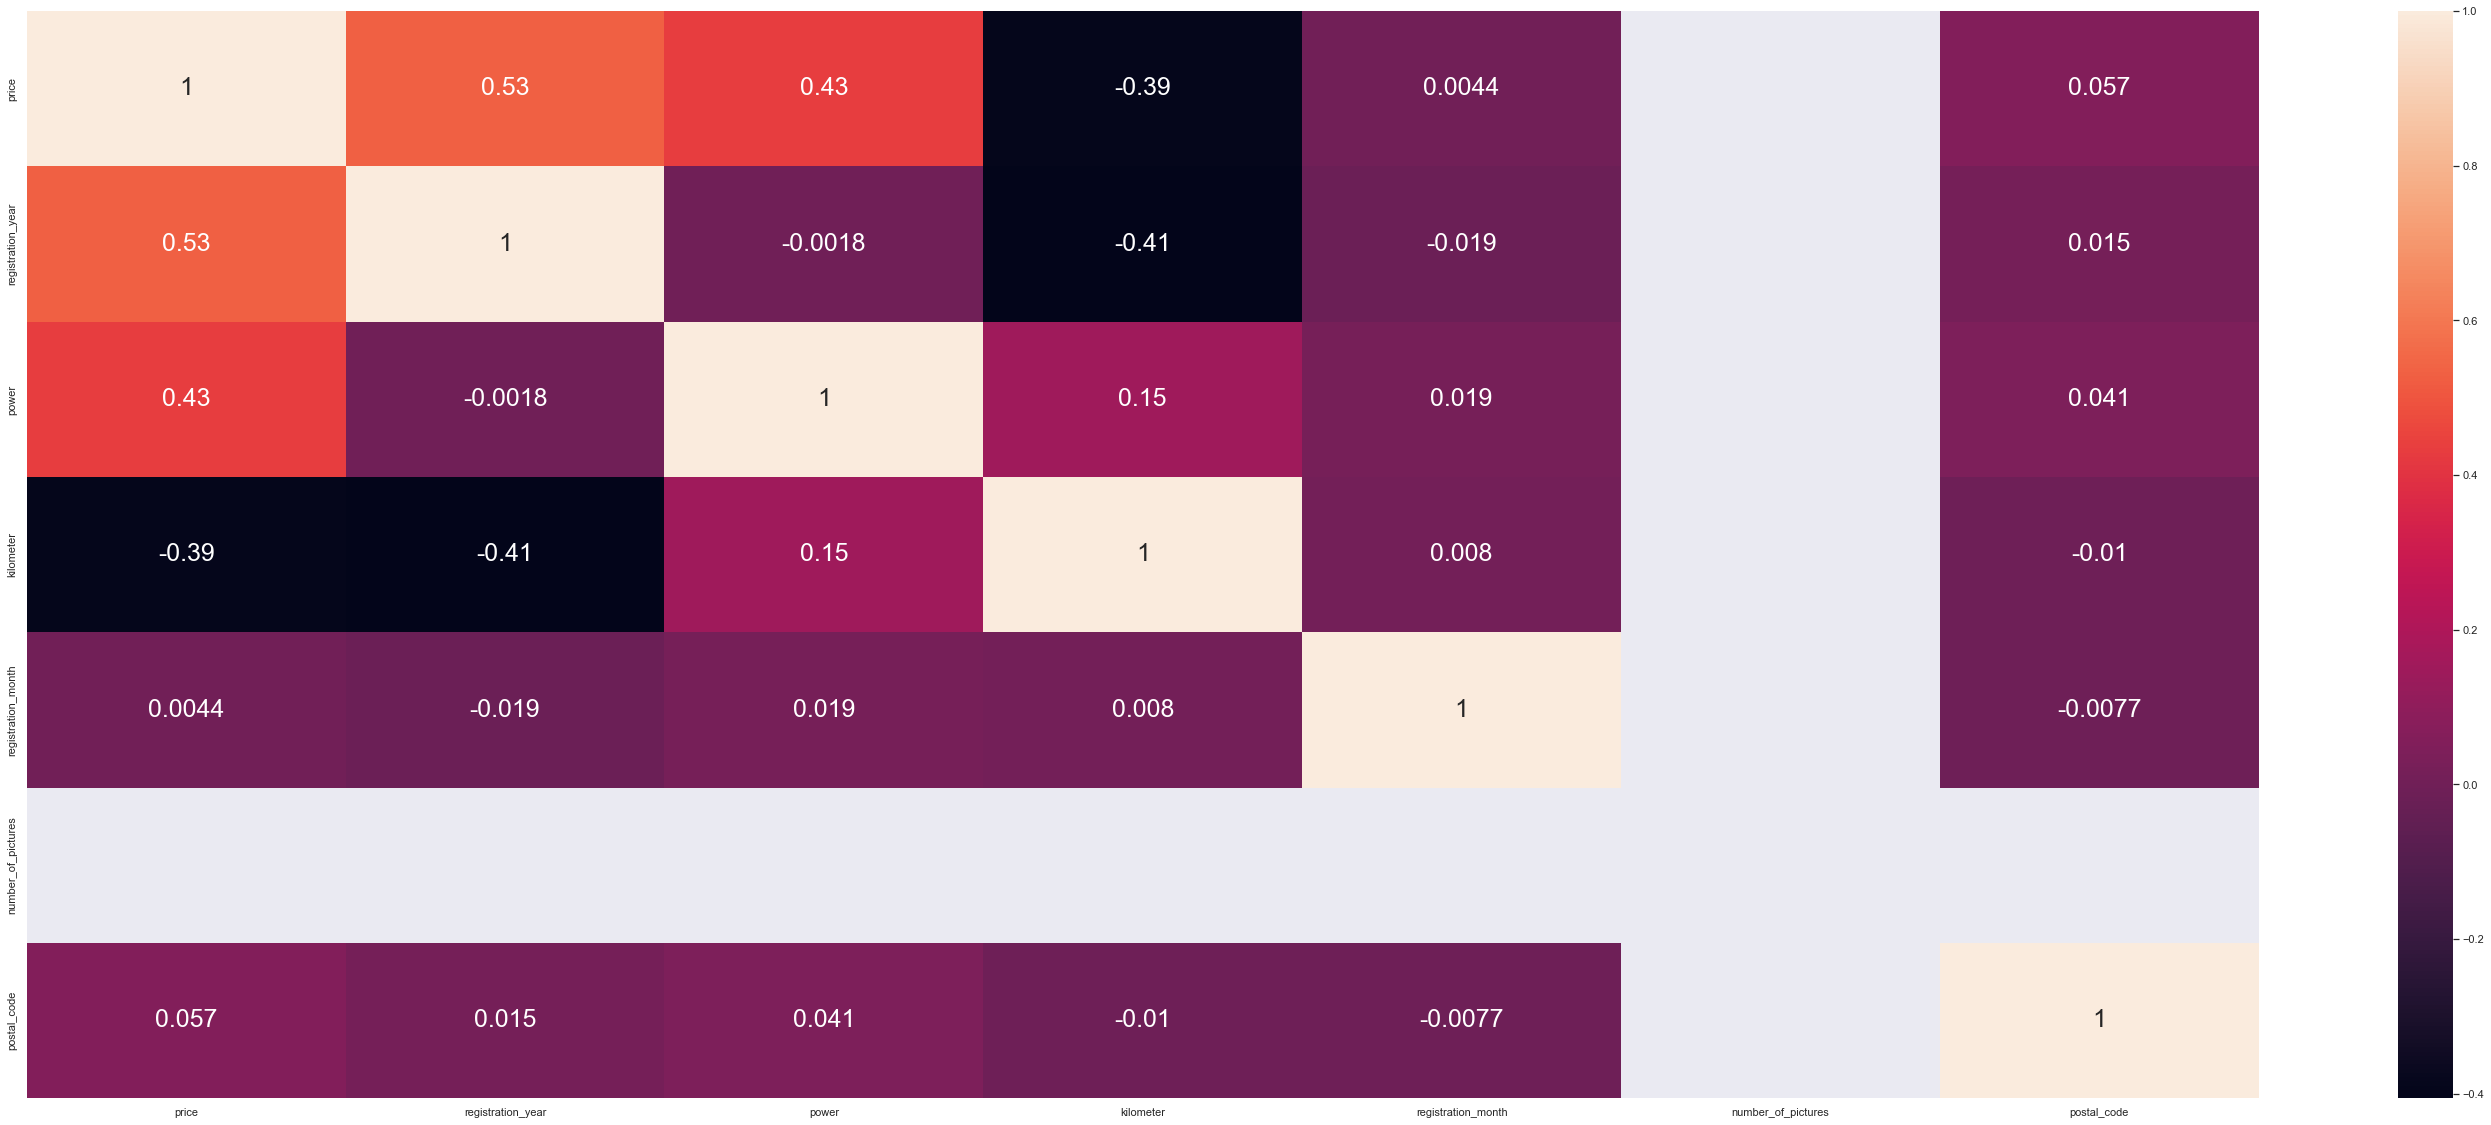

In [92]:
sns.set(rc={'figure.figsize':(50,20)})
sns.heatmap(data.corr(), annot=True, annot_kws={"fontsize":25});

Как видно из тепловой карты наименьшее влияние имеют столбцы postal_code и number_of_pictures, также удалим столбцы с датами.

In [93]:
col_to_del = ['date_crawled', 'date_created', 'number_of_pictures',
       'postal_code', 'last_seen']

In [94]:
data = data.drop(col_to_del, axis = 1)

In [95]:
data.head()

,price,vehicle_type,registration_year,gearbox,power,model,kilometer,registration_month,fuel_type,brand,repaired
1,18300,coupe,2011,manual,190,a4,125000,5,gasoline,audi,yes
2,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,no
3,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no
4,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no
6,2200,convertible,2004,manual,109,2_reihe,150000,8,petrol,peugeot,no


In [96]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 237358 entries, 1 to 354368
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   price               237358 non-null  int64 
 1   vehicle_type        237358 non-null  object
 2   registration_year   237358 non-null  int64 
 3   gearbox             237358 non-null  object
 4   power               237358 non-null  int64 
 5   model               237358 non-null  object
 6   kilometer           237358 non-null  int64 
 7   registration_month  237358 non-null  int64 
 8   fuel_type           237358 non-null  object
 9   brand               237358 non-null  object
 10  repaired            237358 non-null  object
dtypes: int64(5), object(6)
memory usage: 21.7+ MB


Итак, мы получили данные в количестве 237358 строк и 11 колонок, заполнили пропуски в соответствии с наиболее популярным значением для выбранного столбца и модели или бренда. Далее удалили неинформативные колонки дат и количества фотографий, провели исследование аномальных значений, в результате чего удалили нулевые значения цены, мощности и месяца, также года публикации - слишком ранние и будущие, и нереальные мощности.

## Обучение моделей

### Подготовка выборок

In [97]:
state = RandomState(12345)

Начнем подготовку выборок с кодирования категориальных данных методом порядкового кодирования Ordinal Encording. Выбрала этот тип кодирования, потому что некоторые признаки содержат большое количество переменных, процесс кодировки сильно загружает память созданием новых колонок, что усложняет процесс расчета.

Целевой признак - цена, обучающие признаки - все остальные.

In [98]:
target = data['price']
features = data.loc[:,~data.columns.isin (['price'])]

Выделим тестовую выборку, оценку качества валидационной выборкой проведем с помощью кросс-валидации.

In [99]:
X_train,X_test,Y_train,Y_test = train_test_split(features,target,test_size=0.25,random_state=state)

### Обучение базовой модели

In [100]:
def rmse(target,prediction):
    score = sqrt(mean_squared_error(target,prediction))
    return score

In [101]:
predictions = pd.Series(Y_train.mean(), index=X_train.index)
rmse_based = rmse(Y_train,predictions)
rmse_based

4574.490279691608

RMSE базовой модели 4574 евро.

In [102]:
def get_data_info(data):
    display(data.head())
    display(data.info())
    display(data.describe(include='all'))

In [103]:
get_data_info(X_train)

,vehicle_type,registration_year,gearbox,power,model,kilometer,registration_month,fuel_type,brand,repaired
313296,sedan,2008,manual,122,golf,125000,7,petrol,volkswagen,no
346099,convertible,2003,auto,197,clk,125000,6,petrol,mercedes_benz,no
208752,sedan,2004,manual,116,avensis,150000,4,gasoline,toyota,no
118538,small,2001,manual,53,swift,70000,5,petrol,suzuki,no
104102,sedan,2004,manual,170,5er,150000,4,petrol,bmw,no


<class 'pandas.core.frame.DataFrame'>
Int64Index: 178018 entries, 313296 to 324823
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   vehicle_type        178018 non-null  object
 1   registration_year   178018 non-null  int64 
 2   gearbox             178018 non-null  object
 3   power               178018 non-null  int64 
 4   model               178018 non-null  object
 5   kilometer           178018 non-null  int64 
 6   registration_month  178018 non-null  int64 
 7   fuel_type           178018 non-null  object
 8   brand               178018 non-null  object
 9   repaired            178018 non-null  object
dtypes: int64(4), object(6)
memory usage: 14.9+ MB


None

,vehicle_type,registration_year,gearbox,power,model,kilometer,registration_month,fuel_type,brand,repaired
count,178018,178018.000000,178018,178018.000000,178018,178018.000000,178018.000000,178018,178018,178018
unique,8,NaN,2,NaN,246,NaN,NaN,7,38,2
top,sedan,NaN,manual,NaN,golf,NaN,NaN,petrol,volkswagen,no
freq,58481,NaN,138761,NaN,15966,NaN,NaN,111526,39315,167028
mean,NaN,2004.734549,NaN,129.104203,NaN,126139.098293,6.429878,NaN,NaN,NaN
std,NaN,5.355269,NaN,56.773423,NaN,37609.944971,3.354351,NaN,NaN,NaN
min,NaN,1990.000000,NaN,50.000000,NaN,5000.000000,1.000000,NaN,NaN,NaN
25%,NaN,2001.000000,NaN,90.000000,NaN,100000.000000,4.000000,NaN,NaN,NaN
50%,NaN,2005.000000,NaN,120.000000,NaN,150000.000000,6.000000,NaN,NaN,NaN
75%,NaN,2008.000000,NaN,150.000000,NaN,150000.000000,9.000000,NaN,NaN,NaN


In [104]:
get_data_info(X_test)

,vehicle_type,registration_year,gearbox,power,model,kilometer,registration_month,fuel_type,brand,repaired
73882,coupe,2000,manual,102,3er,150000,4,petrol,bmw,no
326678,sedan,2002,manual,115,c_klasse,150000,11,gasoline,mercedes_benz,no
55347,suv,2011,manual,150,rav,100000,2,gasoline,toyota,no
55344,small,2001,manual,60,punto,150000,6,petrol,fiat,no
209478,sedan,2009,manual,80,golf,70000,2,petrol,volkswagen,no


<class 'pandas.core.frame.DataFrame'>
Int64Index: 59340 entries, 73882 to 247376
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   vehicle_type        59340 non-null  object
 1   registration_year   59340 non-null  int64 
 2   gearbox             59340 non-null  object
 3   power               59340 non-null  int64 
 4   model               59340 non-null  object
 5   kilometer           59340 non-null  int64 
 6   registration_month  59340 non-null  int64 
 7   fuel_type           59340 non-null  object
 8   brand               59340 non-null  object
 9   repaired            59340 non-null  object
dtypes: int64(4), object(6)
memory usage: 5.0+ MB


None

,vehicle_type,registration_year,gearbox,power,model,kilometer,registration_month,fuel_type,brand,repaired
count,59340,59340.000000,59340,59340.000000,59340,59340.000000,59340.000000,59340,59340,59340
unique,8,NaN,2,NaN,241,NaN,NaN,7,38,2
top,sedan,NaN,manual,NaN,golf,NaN,NaN,petrol,volkswagen,no
freq,19654,NaN,46234,NaN,5407,NaN,NaN,37144,13168,55717
mean,NaN,2004.757331,NaN,129.195281,NaN,126245.197169,6.426458,NaN,NaN,NaN
std,NaN,5.357896,NaN,56.413964,NaN,37506.509742,3.354796,NaN,NaN,NaN
min,NaN,1990.000000,NaN,50.000000,NaN,5000.000000,1.000000,NaN,NaN,NaN
25%,NaN,2001.000000,NaN,90.000000,NaN,100000.000000,4.000000,NaN,NaN,NaN
50%,NaN,2005.000000,NaN,120.000000,NaN,150000.000000,6.000000,NaN,NaN,NaN
75%,NaN,2008.000000,NaN,150.000000,NaN,150000.000000,9.000000,NaN,NaN,NaN


Создаем списки названий колонок, содержащих только категориальные признаки

In [105]:
features_rf = X_train.select_dtypes(include='object').columns.to_list()
print(features_rf)

['vehicle_type', 'gearbox', 'model', 'fuel_type', 'brand', 'repaired']


Создаем списки названий колонок, содержащих только числовые признаки

In [106]:
num_features = X_train.select_dtypes(exclude='object').columns.to_list()
num_features

['registration_year', 'power', 'kilometer', 'registration_month']

### Обучение RFR модели

Копируем в отдельные переменные обучающие и тестовые выборки для модели RFR.

In [107]:
X_train_rf = X_train.copy()
X_test_rf = X_test.copy()

Применяем make_column_transformer, который получает типы кодировщиков и тип масштабирования, и соответствующие для каждого типа колонки с категориальными и числовыми данными.

In [108]:
col_transformer_rf = make_column_transformer(
    (OrdinalEncoder(handle_unknown='use_encoded_value',unknown_value=-1),features_rf),
    (StandardScaler(),num_features),
    remainder='passthrough')

In [109]:
model_rf = RandomForestRegressor(random_state=state)

Применяем make_pipeline для того, чтобы одновременно сообщить расчетному модулю модель model_rf и make_column_transformer с необходимой кодировкой данных для нее.

In [110]:
pipeline_rf = make_pipeline(col_transformer_rf,model_rf)

Создаем словарь гиперпараметров модели, из которых будет произведен подбор модели с лучшей метрикой RMSE на выходе.

In [111]:
param_grid_rf = {
    'randomforestregressor__n_estimators': range(20, 100, 20),
    'randomforestregressor__max_depth': range(2, 14, 2),
    'randomforestregressor__min_samples_split': (2, 4, 7),
    'randomforestregressor__min_samples_leaf': (1, 2, 3, 4, 5)
}

Используем RandomizedSearchCV, которые принимает на вход созданный выше pipeline с кодировками и масштабированием данных и моделью, гиперпараметры модели, метрику для расчета.

In [112]:
gs_rf = RandomizedSearchCV(
        pipeline_rf,
        param_distributions = param_grid_rf,
        scoring = 'neg_root_mean_squared_error',
        n_jobs = -1,
        random_state=state)

In [113]:
%%time

gs_rf.fit(X_train_rf, Y_train)

CPU times: total: 18.8 s
Wall time: 3min 12s


RandomizedSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('ordinalencoder',
                                                                               OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                              unknown_value=-1),
                                                                               ['vehicle_type',
                                                                                'gearbox',
                                                                                'model',
                                                                                'fuel_type',
                                                                                'brand',
                                              

Выведем параметры, при которых была получена лучшая модель.

In [114]:
gs_rf_best_score = gs_rf.best_score_ * -1
gs_rf_best_params = gs_rf.best_params_
print(f'best_score: {gs_rf_best_score}')
print(f'best_params: {gs_rf_best_params}')

best_score: 1769.3026618515119
best_params: {'randomforestregressor__n_estimators': 40, 'randomforestregressor__min_samples_split': 2, 'randomforestregressor__min_samples_leaf': 5, 'randomforestregressor__max_depth': 12}


Выведем время, которое требуется на обучение лучшей модели.

In [115]:
gs_rf_res = gs_rf.refit_time_
gs_rf_res

13.032597780227661

Время предсказания.

In [116]:
%%time
gs_rf.predict(X_train_rf)

CPU times: total: 1.12 s
Wall time: 1.13 s


array([7700.23248382, 9199.88623083, 4071.44524863, ..., 4323.71955556,
       8968.96617325, 3530.00411001])

**Вывод: для модели RFR мы получили следующие результаты RMSE на валидационной выборке 1769 евро, время обучения одной модели 10 сек, время предсказания  -  около 1 сек.**

### Обучение LGBM модели

Создаем обучающую и тестовую выборки признаков для LGBM Regressor. 

In [117]:
X_train_lgbn = X_train.copy()
X_test_lgbn = X_test.copy()

Как и в предыдущей модели используем make_column_transformer для кодировки и масштабирования.

In [118]:
col_transformer_lgbm = make_column_transformer(
    (OrdinalEncoder(handle_unknown='use_encoded_value',unknown_value=-1),features_rf),
    (StandardScaler(),num_features),
    remainder='passthrough')

Обучаем модель LGBM Regressor, изменяем только два параметра: глубину и скорость обучения

In [119]:
model_lgbm = LGBMRegressor(max_depth = 5,learning_rate = 0.3)

Создаем pipeline

In [120]:
pipeline_lgbm = Pipeline(steps=[
    ('transformer', col_transformer_lgbm),
    ('model', model_lgbm)
])

In [121]:
%%time

pipeline_lgbm.fit(X_train_lgbn, Y_train)

CPU times: total: 3.11 s
Wall time: 693 ms


Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['vehicle_type', 'gearbox',
                                                   'model', 'fuel_type',
                                                   'brand', 'repaired']),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  ['registration_year', 'power',
                                                   'kilometer',
                                                   'registration_month'])])),
                ('model', LGBMRegressor(learning_rate=0.3, max_depth=5)

Используем кроссвалидацию для расчета rmse на валидационной выборке.

In [122]:
scores_lgbm = cross_val_score (pipeline_lgbm,X_train_lgbn,Y_train,cv=5,\
                                         scoring = make_scorer(rmse, greater_is_better=False))
final_score = scores_lgbm.mean()*(-1)
print (final_score)

1668.9159251476617


In [123]:
%%time

pipeline_lgbm.predict(X_train_lgbn)

CPU times: total: 2.17 s
Wall time: 470 ms


array([7442.25317767, 9221.57746947, 3280.246341  , ..., 4206.85391731,
       8893.36052032, 3750.89694738])

**Вывод: для модели LGBM мы получили следующие результаты RMSE на валидационной выборке 1672 евро, время обучения одной модели 3 сек, время предсказания  - 1.33 сек.**

## Анализ моделей

In [127]:
analysis = pd.DataFrame({
    'Random Forest Regressor' : ['3min 12s', '1.13 s', gs_rf_best_score],
    'LGBMRegressor' : ['693 ms', '470 ms', final_score],
}, index = ['fit_wall_time','prediction_wall_time','RMSE'])

In [128]:
analysis

,Random Forest Regressor,LGBMRegressor
fit_wall_time,3min 12s,693 ms
prediction_wall_time,1.13 s,470 ms
RMSE,1769.302662,1668.915925


Обе модели обучились и выполняли прогноз за очень короткое время, однако для модели RFR также был использован подбор гиперпараметров через RandomizedSearchCV, который занял около 6 мин. Метрика RMSE на валидационной выборке лучше у LGBMRegressor.  Для финального тестирования выберем модель LGBMRegressor

### Тестирование модель

In [129]:
predictions_lgb = pipeline_lgbm.predict(X_test_lgbn)
rmse_final_lgb = rmse(Y_test, predictions_lgb)
print (rmse_final_lgb)

1655.8405633411642


## Вывод

В данном проекте мы построили модель прогнозирования цены автомобиля.

Изначально нам были предоставлены данные о технических характеристиках, комплектации и ценах других автомобилей. Мы провели предобработку данных: обработали пропуски и удалили неинформативные колонки, после чего провели исследовательский анализ, для этого построили графики для общей визуализации данных каждой колонки. Это дало нам возможность отсеять данные, в которых есть аномалии, а именно нулевые значения мощности, цены, некорректные года, мощность сверх реальной. Нулевой месяц мы заменили случайным значением выбранным рандомно по всем значениям данной колонки. 

После этого мы приступили к подготовке выборок. Мы поделили исходную выборку на тренировочную и тестовую. Использовали make_column_transformer для порядкового кодирования и масштабирования, pipeline для создания единой структуры модели и make_column_transformer, и далее запустили обучение и подбор гиперпараметров через RandomizedSearchCV - для RFR, для LGBM оценили качество модели через кросс-валидацию.

После анализа работы каждой модели, мы сделали выбор в пользу LGBM Regressor, получили RMSE на тестовой выборке 1655, что ниже порогового значения заказчика 2500.